#### Dataset: https://www.kaggle.com/harlfoxem/housesalesprediction

<div class="alert alert-block alert-info">
<b><font size="4"> Importing the Necessary Libraries</font></b>
</div>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
sns.set()

<div class="alert alert-block alert-info">
<b><font size="4">Data Acquisition</font></b>
<div>

In [62]:
df = pd.read_csv("kc_house_data.csv")
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


<div class="alert alert-block alert-info">
<b><font size="4"> Filling missing values across the dataset</font></b>
</div>

In [4]:
from numpy import random as rn
def rand():
    p = 0.015
    data =rn.random(len(df))
    return list(map(lambda x: x < p, data))
df.loc[rand(), 'date'] = None
df.loc[rand(), 'waterfront'] = None
df.loc[rand(), 'yr_built'] = None
df.loc[rand(), 'yr_renovated'] = None
df.loc[rand(), 'bathrooms'] = None

In [9]:
x = df.dropna().drop('price',axis=1)
y = df.dropna()['price']

In [15]:
pd.concat([df.isnull().sum().sort_values(ascending = False),((df.isnull().sum() / len(df))*100).sort_values(ascending = False)],axis = 1,keys = ['Total','Percent %'])

,Total,Percent %
yr_built,354,1.637903
bathrooms,342,1.582381
yr_renovated,332,1.536113
date,301,1.392680
waterfront,294,1.360292
sqft_lot15,0,0.000000
price,0,0.000000
bedrooms,0,0.000000
sqft_living,0,0.000000
sqft_lot,0,0.000000


In [16]:
# drop id and date columns
df.drop(['id', 'date'],axis=1, inplace=True)

#filling the NaN values with 0 for 'yr_renovated', 'yr_built', and waterfront features
df['yr_renovated'].fillna(0,inplace=True)
df['yr_built'].fillna(0,inplace=True)
df['waterfront'].fillna(0,inplace=True)

In [17]:
df[['bedrooms','bathrooms']].groupby('bedrooms').mean().sort_values('bathrooms',ascending=False)

,bathrooms
bedrooms,
9,4.416667
7,3.651316
8,3.557692
10,3.416667
6,3.066479
11,3.000000
5,2.780120
4,2.433600
3,1.967829


In [18]:
#grouby by baedrooms and replace with mean for bathrooms missing values
bedrooms_grouped = df.groupby(["bedrooms"])
bedrooms_imputed = bedrooms_grouped.transform(lambda grp: grp.fillna(grp.mean()))
bedrooms_imputed

,price,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,221900.0,1.00,1180,5650,1.0,0.0,0,3,7,1180,0,1955.0,0.0,98178,47.5112,-122.257,1340,5650
1,538000.0,2.25,2570,7242,2.0,0.0,0,3,7,2170,400,1951.0,1991.0,98125,47.7210,-122.319,1690,7639
2,180000.0,1.00,770,10000,1.0,0.0,0,3,6,770,0,1933.0,0.0,98028,47.7379,-122.233,2720,8062
3,604000.0,3.00,1960,5000,1.0,0.0,0,5,7,1050,910,1965.0,0.0,98136,47.5208,-122.393,1360,5000
4,510000.0,2.00,1680,8080,1.0,0.0,0,3,8,1680,0,1987.0,0.0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,360000.0,2.50,1530,1131,3.0,0.0,0,3,8,1530,0,2009.0,0.0,98103,47.6993,-122.346,1530,1509
21609,400000.0,2.50,2310,5813,2.0,0.0,0,3,8,2310,0,2014.0,0.0,98146,47.5107,-122.362,1830,7200
21610,402101.0,0.75,1020,1350,2.0,0.0,0,3,7,1020,0,2009.0,0.0,98144,47.5944,-122.299,1020,2007
21611,400000.0,2.50,1600,2388,2.0,0.0,0,3,8,1600,0,2004.0,0.0,98027,47.5345,-122.069,1410,1287


In [19]:
bedrooms_imputed['bathrooms'].isnull().sum()

0

In [20]:
df['bathrooms'] = bedrooms_imputed['bathrooms']

<div class="alert alert-block alert-warning">
                                                                                       
We will lose the rest of the features just because one of the features had a missing value even if it’s a small percentage of the dataset. Instead of dropping one whole observation, we will keep the data. 
    
    
From above we can see that the `yr_renovated`, `yr_built` and `waterfront` are missing only about 0.015% of the data, hence we will be replacing null values in the column with '0' in the dataset as its logic to conclude that if it's null then it's possibly there's no yr_renovated, yr_built or waterfront data. 

We also replace `bathrooms` with mean grouping by the `bedrooms` as more bedrooms indicates more bathrooms and it's beneficial for simple linear models. 
<br>
    
And we will also be dropping the features `id` and `date as they won't be quite useful for Regression analysis. Hence we will be dropping these features while modelling but for Exploratiry Data Analysis(EDA), we will make use of it to understand the dataset better.
<div>

In [21]:
# Checking the shape of the dataset after dropping the NaN values
df.shape

(21613, 19)

In [483]:
df.isnull().sum().sum()

0

Now, all the NaN values are removed from the Dataframe

<div class="alert alert-block alert-info">
<b><font size="4"> Data Partitioning :</font></b>
    
Machine learning methods typically require splitting data into multiple chunks for training, validating, and finally testing for building and training a model
    <div>

In [23]:
X=df.drop(['price'],axis=1)
y=df['price']

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
X_train_org, X_test_org, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)

In [26]:
print(X_train_org.shape, y_train.shape)

(15129, 18) (15129,)


In [27]:
print(X_test_org.shape, y_test.shape)

(6484, 18) (6484,)


<div class="alert alert-block alert-info">
<b><font size="4"> Feature Scaling</font></b>
<div>

In [28]:
from sklearn.preprocessing import StandardScaler

In [29]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train_org)
X_test = scaler.transform(X_test_org)

<div class="alert alert-block alert-info">
<b><font size="4"> Model Evaluation strategy (Metrics Selection)</font></b>

In [111]:
from sklearn.metrics import mean_squared_error, r2_score, explained_variance_score
from sklearn.model_selection import GridSearchCV

<div class="alert alert-block alert-info">
<b><font size="4">Ensemble Method (Bagging)</font></b>
    
- Linear Regression
- KNN Regression
<div>

Linear Regression

In [141]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import BaggingRegressor

params_grid = {
    'max_features': [2, 5, 10],
    'n_estimators':[100, 200, 300, 500],
    'max_samples':[0.1, 0.5, 1]}

lreg_br = GridSearchCV(BaggingRegressor(LinearRegression(), bootstrap=True, random_state=0), params_grid, return_train_score=True, cv = 6, n_jobs=-1, oob_score = True)
lreg_br.fit(X_train, y_train)
#6-fold cross validation instead of default 5

GridSearchCV(cv=6, error_score=nan,
             estimator=BaggingRegressor(base_estimator=LinearRegression(copy_X=True,
                                                                        fit_intercept=True,
                                                                        n_jobs=None,
                                                                        normalize=False),
                                        bootstrap=True,
                                        bootstrap_features=False,
                                        max_features=1.0, max_samples=1.0,
                                        n_estimators=10, n_jobs=None,
                                        oob_score=False, random_state=0,
                                        verbose=0, warm_start=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'max_features': [2, 5, 10],
                         'max_samples': [0.1, 0.5, 1],
                         'n_estimators': [100, 200, 

In [142]:
lreg_br.score(X_test, y_test)
#R2 score

0.6415388675010254

In [143]:
print(f'Best parameters: {lreg_br.best_params_}')
print(f'Best cross-validation score: {lreg_br.best_score_}')
#Grid Search to find the best scaling parameter and mean testing score

Best parameters: {'max_features': 10, 'max_samples': 0.1, 'n_estimators': 300}
Best cross-validation score: 0.6591257185817697


In [144]:
result7=pd.DataFrame(lreg_br.cv_results_)
result7.head(6)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_features,param_max_samples,param_n_estimators,params,split0_test_score,split1_test_score,...,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,split5_train_score,mean_train_score,std_train_score
0,0.464948,0.018699,0.019906,0.002812,2,0.1,100,"{'max_features': 2, 'max_samples': 0.1, 'n_est...",0.364583,0.387757,...,0.013465,20,0.375634,0.386459,0.376195,0.374392,0.376618,0.377022,0.377720,0.003996
1,0.813032,0.073208,0.035712,0.015822,2,0.1,200,"{'max_features': 2, 'max_samples': 0.1, 'n_est...",0.349017,0.378960,...,0.014100,23,0.362921,0.372974,0.364735,0.362916,0.363699,0.364078,0.365220,0.003525
2,1.271950,0.090045,0.055481,0.010882,2,0.1,300,"{'max_features': 2, 'max_samples': 0.1, 'n_est...",0.358674,0.388782,...,0.013876,21,0.372749,0.381913,0.373615,0.372234,0.372873,0.372959,0.374391,0.003388
3,2.348678,0.184683,0.120682,0.058434,2,0.1,500,"{'max_features': 2, 'max_samples': 0.1, 'n_est...",0.362692,0.392196,...,0.013703,17,0.376416,0.385705,0.377208,0.376342,0.377911,0.377436,0.378503,0.003268
4,0.527045,0.048262,0.015238,0.001508,2,0.5,100,"{'max_features': 2, 'max_samples': 0.5, 'n_est...",0.362931,0.386378,...,0.013289,18,0.373251,0.384919,0.376179,0.377399,0.378540,0.378655,0.378157,0.003528
5,1.085644,0.038748,0.051953,0.018293,2,0.5,200,"{'max_features': 2, 'max_samples': 0.5, 'n_est...",0.347639,0.376684,...,0.013936,24,0.361273,0.370807,0.362848,0.364043,0.364573,0.364620,0.364694,0.002970


In [145]:
pred = lreg_br.predict(X_test)
print('\nFor max features =', result7['param_max_features'][lreg_br.best_index_],', max samples =',result7['param_max_samples'][lreg_br.best_index_],', n_estimators =', result7['param_n_estimators'][lg_br.best_index_],':')
print('\n\t• Cross validation Training score mean: ',result7['mean_train_score'][lreg_br.best_index_])
print('\n\t• Cross validation Testing score mean: ' ,lreg_br.best_score_)
print('\n\t• R2 Score: ',r2_score(y_test,pred))
print('\n\t• Root Mean Squared Error: ', np.sqrt(mean_squared_error(y_test, pred)))
print('----------------------------------------------------------------------------')


For max features = 10 , max samples = 0.1 , n_estimators = 300 :

	• Cross validation Training score mean:  0.6621088976516362

	• Cross validation Testing score mean:  0.6591257185817697

	• R2 Score:  0.6415388675010253

	• Root Mean Squared Error:  221841.8997094557
----------------------------------------------------------------------------


<div class="alert alert-block alert-warning">
Let's Visualize the plot of the best fit line by the Linear Regression with Bagging Model below for a sample of data with only one x variable and y variable for simplicity:
    <div>

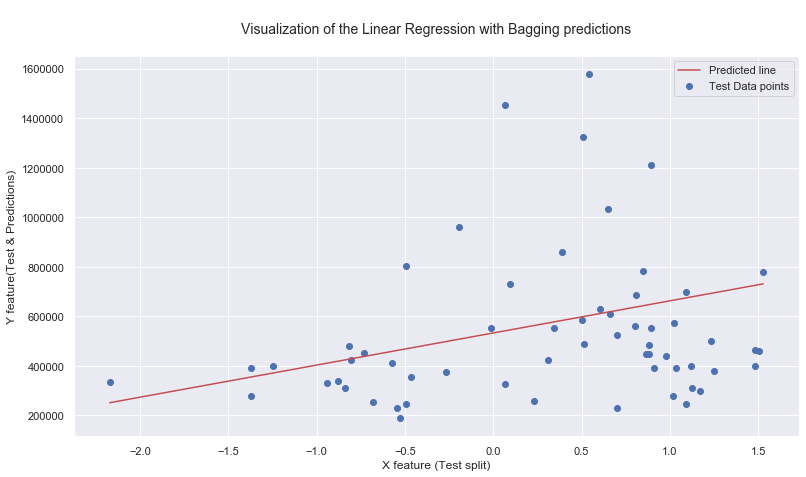

In [166]:
X_b = X_train[:60,14].reshape(-1,1)
y_b = y_train[:60]
lg = BaggingRegressor(LinearRegression(), n_estimators=300, bootstrap=True, random_state=0, oob_score = True)
lg.fit(X_b, y_b)
cm=pd.DataFrame({'x':X_test[:60,14].tolist(),'y':y_test[:60].tolist()}).sort_values(by='x')
y_predict =lg.predict(cm['x'].values.reshape(-1,1))
plt.figure(figsize=(13,7))
plt.plot(cm['x'].tolist(), y_predict, c = 'r',label='Predicted line')
plt.scatter(cm['x'].tolist(), cm['y'].tolist(),label='Test Data points')
plt.title('\nVisualization of the Linear Regression with Bagging predictions\n',fontsize=14)
plt.xlabel('X feature (Test split)',fontsize=12)
plt.ylabel('Y feature(Test & Predictions)',fontsize=12)
plt.legend()
plt.show()

<div class="alert alert-block alert-danger">

From the above results we can see that the Linear Regression with Bagging yields the best results when `max features = 10`, `max samples = 0.1`, and `n_estimators = 200`, which leads to the best R<sup>2</sup> score of `0.641538`.
<div>

KNN Regression

In [59]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import BaggingRegressor

knn_rg = KNeighborsRegressor(n_neighbors = 6)
#Using best parameters from project 1

params_grid = {
    'max_features': [2, 5, 10],
    'n_estimators':[100, 200, 300, 500]}

knn_br = GridSearchCV(BaggingRegressor(knn_rg, bootstrap=True, random_state=0), params_grid, return_train_score=True, cv = 6, n_jobs=-1, oob_score = True)
knn_br.fit(X_train, y_train)
#6-fold cross validation instead of default 5

GridSearchCV(cv=6, error_score=nan,
             estimator=BaggingRegressor(base_estimator=KNeighborsRegressor(algorithm='auto',
                                                                           leaf_size=30,
                                                                           metric='minkowski',
                                                                           metric_params=None,
                                                                           n_jobs=None,
                                                                           n_neighbors=6,
                                                                           p=2,
                                                                           weights='uniform'),
                                        bootstrap=True,
                                        bootstrap_features=False,
                                        max_features=1.0, max_samples=1.0,
                                        n_

In [60]:
knn_br.score(X_test, y_test)
#R2 score

0.7964249609077625

In [65]:
print(f'Best parameters: {knn_br.best_params_}')
print(f'Best cross-validation score: {knn_br.best_score_}')
#Grid Search to find the best scaling parameter and mean testing score

Best parameters: {'max_features': 10, 'n_estimators': 200}
Best cross-validation score: 0.8009569069460669


In [78]:
result8=pd.DataFrame(knn_br.cv_results_)
result8.head(6)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_features,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,...,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,split5_train_score,mean_train_score,std_train_score
0,7.771506,0.695216,3.886072,0.509439,2,100,"{'max_features': 2, 'n_estimators': 100}",0.539648,0.555953,0.546885,...,0.016658,9,0.633299,0.642786,0.630424,0.634607,0.631771,0.635663,0.634758,0.003982
1,13.257809,1.362150,8.510533,0.559427,2,200,"{'max_features': 2, 'n_estimators': 200}",0.533117,0.557240,0.542379,...,0.017319,10,0.627879,0.635597,0.629598,0.628960,0.629731,0.631922,0.630615,0.002535
2,23.657655,0.693305,14.591072,1.530284,2,300,"{'max_features': 2, 'n_estimators': 300}",0.533394,0.553331,0.541611,...,0.015824,11,0.628161,0.635380,0.630481,0.629597,0.629146,0.631700,0.630744,0.002346
3,34.954452,3.754518,22.773945,2.233870,2,500,"{'max_features': 2, 'n_estimators': 500}",0.529435,0.546889,0.536153,...,0.014439,12,0.624492,0.632078,0.625201,0.624615,0.624545,0.627539,0.626412,0.002746
4,7.130376,0.175400,654.204861,916.532906,5,100,"{'max_features': 5, 'n_estimators': 100}",0.754887,0.752731,0.768155,...,0.016110,6,0.840602,0.845053,0.835357,0.835390,0.835630,0.837737,0.838295,0.003547
5,696.976078,899.174039,15.777158,3.417915,5,200,"{'max_features': 5, 'n_estimators': 200}",0.752201,0.760078,0.768220,...,0.017003,5,0.840587,0.844527,0.836012,0.836466,0.836394,0.839226,0.838869,0.003032


In [107]:
pred = knn_br.predict(X_test)
print('\nFor max features =', result8['param_max_features'][knn_br.best_index_], ', n_estimators =', result8['param_n_estimators'][knn_br.best_index_], ':')
print('\n\t• Cross validation Training score mean: ',result8['mean_train_score'][knn_br.best_index_])
print('\n\t• Cross validation Testing score mean: ',knn_br.best_score_)
print('\n\t• R2 Score: ',r2_score(y_test,pred))
print('\n\t• Root Mean Squared Error: ', np.sqrt(mean_squared_error(y_test, pred)))
print('----------------------------------------------------------------------------')


For max features = 10 , n_estimators = 200 :

	• Cross validation Training score mean:  0.8632003481516776

	• Cross validation Testing score mean:  0.8009569069460669

	• R2 Score:  0.7964249609077624

	• Root Mean Squared Error:  167180.18549307476
----------------------------------------------------------------------------


<div class="alert alert-block alert-success">Let's visualize the best fitted line by the KNN with Bagging 

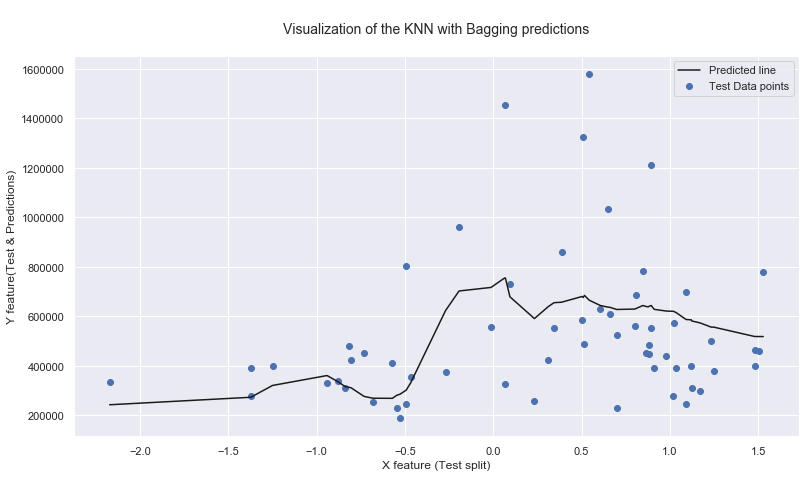

In [167]:
X_b = X_train[:60,14].reshape(-1,1)
y_b = y_train[:60]
lg = BaggingRegressor(knn_rg, n_estimators = 200, bootstrap=True, random_state=0, oob_score = True)
lg.fit(X_b, y_b)
cm=pd.DataFrame({'x':X_test[:60,14].tolist(),'y':y_test[:60].tolist()}).sort_values(by='x')
y_predict =lg.predict(cm['x'].values.reshape(-1,1))
plt.figure(figsize=(13,7))
plt.plot(cm['x'].tolist(), y_predict, c = 'k',label='Predicted line')
plt.scatter(cm['x'].tolist(), cm['y'].tolist(),label='Test Data points')
plt.title('\nVisualization of the KNN with Bagging predictions\n',fontsize=14)
plt.xlabel('X feature (Test split)',fontsize=12)
plt.ylabel('Y feature(Test & Predictions)',fontsize=12)
plt.legend()
plt.show()

<div class="alert alert-block alert-danger">

From the above results we can see that the KNN with Bagging Model yields the best results when  `max features = 10`, and `n_estimators = 200`, which leads to the best R<sup>2</sup> score of `0.796424`.  
<div>

<div class="alert alert-block alert-info">
<b><font size="4">Ensemble Methods (Pasting)</font></b>
    
- LASSO Regression
- Decision Tree Regression
<div>

LASSO Regression

In [88]:
from sklearn.ensemble import BaggingRegressor
from sklearn.linear_model import Lasso

lasso_reg = Lasso(alpha=120)
#Using best parameters from project 1

params_grid = {
    'max_features': [2, 5, 10],
    'n_estimators':[100, 200, 300, 500],
    'max_samples':[0.1, 0.5, 1]}

lasso_p = GridSearchCV(BaggingRegressor(lasso_reg, bootstrap=False, random_state=0), params_grid, return_train_score=True, cv = 6, n_jobs=-1)
lasso_p.fit(X_train, y_train)
#6-fold cross validation instead of default 5

GridSearchCV(cv=6, error_score=nan,
             estimator=BaggingRegressor(base_estimator=Lasso(alpha=120,
                                                             copy_X=True,
                                                             fit_intercept=True,
                                                             max_iter=1000,
                                                             normalize=False,
                                                             positive=False,
                                                             precompute=False,
                                                             random_state=None,
                                                             selection='cyclic',
                                                             tol=0.0001,
                                                             warm_start=False),
                                        bootstrap=False,
                                        bootstrap_featur

In [89]:
lasso_p.score(X_test, y_test)
#R2 score

0.6428744794897534

In [86]:
print(f'Best parameters: {lasso_p.best_params_}')
print(f'Best cross-validation score: {lasso_p.best_score_}')
#Grid Search to find the best scaling parameter and mean testing score

Best parameters: {'max_features': 10, 'max_samples': 0.5, 'n_estimators': 300}
Best cross-validation score: 0.6592221660124201


In [69]:
result9=pd.DataFrame(lasso_p.cv_results_)
result9.head(6)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_features,param_max_samples,param_n_estimators,params,split0_test_score,split1_test_score,...,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,split5_train_score,mean_train_score,std_train_score
0,0.295418,0.044535,0.020652,0.005874,2,0.1,100,"{'max_features': 2, 'max_samples': 0.1, 'n_est...",0.381526,0.403662,...,0.013211,18,0.392714,0.400860,0.394893,0.394294,0.394332,0.393422,0.395086,0.002676
1,0.553794,0.055904,0.028562,0.001806,2,0.1,200,"{'max_features': 2, 'max_samples': 0.1, 'n_est...",0.368945,0.398149,...,0.013931,23,0.384178,0.391446,0.385077,0.384295,0.383966,0.382648,0.385268,0.002855
2,0.738379,0.019551,0.041522,0.002661,2,0.1,300,"{'max_features': 2, 'max_samples': 0.1, 'n_est...",0.379955,0.411718,...,0.014029,17,0.395704,0.403784,0.396685,0.394426,0.393203,0.393047,0.396141,0.003652
3,1.518081,0.092900,0.073699,0.008417,2,0.1,500,"{'max_features': 2, 'max_samples': 0.1, 'n_est...",0.375192,0.404403,...,0.013592,21,0.388689,0.397718,0.391511,0.389679,0.389211,0.389123,0.390989,0.003141
4,0.415118,0.099027,0.014988,0.001316,2,0.5,100,"{'max_features': 2, 'max_samples': 0.5, 'n_est...",0.381111,0.403599,...,0.013132,20,0.391556,0.400784,0.394044,0.393544,0.393211,0.392752,0.394315,0.002994
5,0.761993,0.055583,0.029789,0.005027,2,0.5,200,"{'max_features': 2, 'max_samples': 0.5, 'n_est...",0.366603,0.397013,...,0.014288,24,0.381105,0.390214,0.383443,0.383270,0.382751,0.382155,0.383823,0.002961


In [486]:
pred = lasso_p.predict(X_test)
print('\nFor max features =', result9['param_max_features'][lasso_p.best_index_],', max samples =',result9['param_max_samples'][lasso_p.best_index_],', n_estimators =',result9['param_n_estimators'][lasso_p.best_index_],':')
print('\n\t• Cross validation Training score mean: ',result9['mean_train_score'][lasso_p.best_index_])
print('\n\t• Cross validation Testing score mean: ',lasso_p.best_score_)
print('\n\t• R2 Score: ',r2_score(y_test,pred))
print('\n\t• Root Mean Squared Error: ', np.sqrt(mean_squared_error(y_test, pred)))
print('----------------------------------------------------------------------------')


For max features = 10 , max samples = 0.5 , n_estimators = 300 :

	• Cross validation Training score mean:  0.6642343702135439

	• Cross validation Testing score mean:  0.6612950769088024

	• R2 Score:  0.6428744794897534

	• Root Mean Squared Error:  221428.22694981386
----------------------------------------------------------------------------


<div class="alert alert-block alert-success">Let's visualize the best fitted line by the Lasso with Pasting 

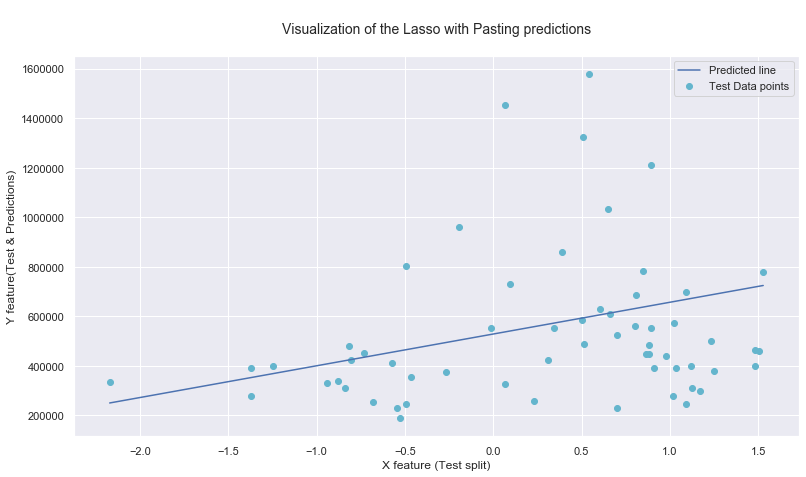

In [178]:
X_b = X_train[:60,14].reshape(-1,1)
y_b = y_train[:60]
lasso = BaggingRegressor(lasso_reg, n_estimators = 300, bootstrap=False, random_state=0)
lasso.fit(X_b, y_b)
cm=pd.DataFrame({'x':X_test[:60,14].tolist(),'y':y_test[:60].tolist()}).sort_values(by='x')
y_predict =lasso.predict(cm['x'].values.reshape(-1,1))
plt.figure(figsize=(13,7))
plt.plot(cm['x'].tolist(), y_predict, c = 'b',label='Predicted line')
plt.scatter(cm['x'].tolist(), cm['y'].tolist(),label='Test Data points',c='c')
plt.title('\nVisualization of the Lasso with Pasting predictions\n',fontsize=14)
plt.xlabel('X feature (Test split)',fontsize=12)
plt.ylabel('Y feature(Test & Predictions)',fontsize=12)
plt.legend()
plt.show()

<div class="alert alert-block alert-danger">

From the above results we can see that the Lasso with Pasting Model yields the best results when  `max features = 10`, `max samples = 0.5`, and `n_estimators = 300`, which leads to the best R<sup>2</sup> score of `0.642874`.  
<div>

Decision Tree Regression

In [225]:
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor

dtree = DecisionTreeRegressor()
#baseline

params_grid = {
    'max_features': [2, 5, 10],
    'n_estimators':[100, 200, 300, 500],
    'max_samples':[0.1, 0.5, 1]}

dtree_p = GridSearchCV(BaggingRegressor(dtree, bootstrap=False, random_state=0), params_grid, return_train_score=True, cv = 6, n_jobs=-1)
dtree_p.fit(X_train, y_train)
#6-fold cross validation instead of default 5

GridSearchCV(cv=6, error_score=nan,
             estimator=BaggingRegressor(base_estimator=DecisionTreeRegressor(ccp_alpha=0.0,
                                                                             criterion='mse',
                                                                             max_depth=None,
                                                                             max_features=None,
                                                                             max_leaf_nodes=None,
                                                                             min_impurity_decrease=0.0,
                                                                             min_impurity_split=None,
                                                                             min_samples_leaf=1,
                                                                             min_samples_split=2,
                                                                             min_weight_fr

In [226]:
dtree_p.score(X_test, y_test)
#R2 score

0.864006589272607

In [227]:
print(f'Best parameters: {dtree_p.best_params_}')
print(f'Best cross-validation score: {dtree_p.best_score_}')
#Grid Search to find the best scaling parameter and mean testing score

Best parameters: {'max_features': 10, 'max_samples': 0.5, 'n_estimators': 300}
Best cross-validation score: 0.8553271775874932


In [228]:
result10=pd.DataFrame(dtree_p.cv_results_)
result10.head(6)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_features,param_max_samples,param_n_estimators,params,split0_test_score,split1_test_score,...,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,split5_train_score,mean_train_score,std_train_score
0,0.653102,0.056957,0.061304,0.018388,2,0.1,100,"{'max_features': 2, 'max_samples': 0.1, 'n_est...",0.565270,0.584925,...,0.017906,18,0.631479,0.632363,0.626801,0.627134,0.629599,0.631668,0.629841,0.002199
1,0.983978,0.064455,0.102465,0.009316,2,0.1,200,"{'max_features': 2, 'max_samples': 0.1, 'n_est...",0.537457,0.570121,...,0.017162,23,0.608077,0.611088,0.604544,0.602234,0.603454,0.606863,0.606043,0.002992
2,1.375900,0.028345,0.134452,0.017674,2,0.1,300,"{'max_features': 2, 'max_samples': 0.1, 'n_est...",0.542822,0.573050,...,0.015683,22,0.609756,0.617310,0.610207,0.605102,0.604646,0.609409,0.609405,0.004172
3,2.317947,0.066545,0.244664,0.036001,2,0.1,500,"{'max_features': 2, 'max_samples': 0.1, 'n_est...",0.536700,0.562858,...,0.014850,24,0.601408,0.609710,0.602482,0.597274,0.597376,0.601861,0.601685,0.004147
4,1.321995,0.051817,0.062157,0.012601,2,0.5,100,"{'max_features': 2, 'max_samples': 0.5, 'n_est...",0.585024,0.613816,...,0.016015,17,0.769472,0.777028,0.771187,0.768782,0.770852,0.770865,0.771364,0.002673
5,2.521022,0.046726,0.108932,0.010051,2,0.5,200,"{'max_features': 2, 'max_samples': 0.5, 'n_est...",0.557847,0.589521,...,0.015293,20,0.741535,0.752703,0.746152,0.745007,0.745609,0.745519,0.746088,0.003322


In [480]:
pred = dtree_p.predict(X_test)
print('\nFor max features =', result10['param_max_features'][dtree_p.best_index_], ', max_samples =', result10['param_max_samples'][dtree_p.best_index_], ', n_estimators =', result10['param_n_estimators'][dtree_p.best_index_],':')
print('\n\t• Cross validation Training score mean: ',result10['mean_train_score'][dtree_p.best_index_])
print('\n\t• Cross validation Testing score mean: ',dtree_p.best_score_)
print('\n\t• R2 Score: ',r2_score(y_test,pred))
print('\n\t• Root Mean Squared Error: ', np.sqrt(mean_squared_error(y_test, pred)))
print('----------------------------------------------------------------------------')


For max features = 10 , max_samples = 0.5 , n_estimators = 300 :

	• Cross validation Training score mean:  0.9634590685410974

	• Cross validation Testing score mean:  0.8553271775874932

	• R2 Score:  0.864006589272607

	• Root Mean Squared Error:  136641.1386387735
----------------------------------------------------------------------------


<div class="alert alert-block alert-success">Let's visualize the best fitted line by the Decision Tree Regression with Pasting  

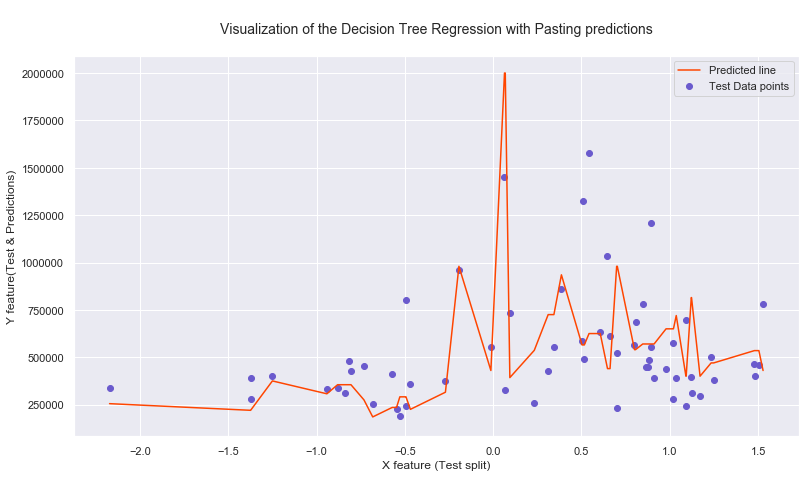

In [231]:
X_b = X_train[:60,14].reshape(-1,1)
y_b = y_train[:60]
dt_p = BaggingRegressor(dtree, n_estimators = 300, bootstrap=False, random_state=0)
dt_p.fit(X_b, y_b)
cm=pd.DataFrame({'x':X_test[:60,14].tolist(),'y':y_test[:60].tolist()}).sort_values(by='x')
y_predict =dt_p.predict(cm['x'].values.reshape(-1,1))
plt.figure(figsize=(13,7))
plt.plot(cm['x'].tolist(), y_predict,c = 'orangered',label='Predicted line')
plt.scatter(cm['x'].tolist(), cm['y'].tolist(),label='Test Data points',c='slateblue')
plt.title('\nVisualization of the Decision Tree Regression with Pasting predictions\n',fontsize=14)
plt.xlabel('X feature (Test split)',fontsize=12)
plt.ylabel('Y feature(Test & Predictions)',fontsize=12)
plt.legend()
plt.show()

<div class="alert alert-block alert-danger">

From the above results we can see that the baseline Decision Tree Regression with Pasting Model yields the best results when  `max features = 10`, `max_samples = 0.5`, and `n_estimators = 300`, which leads to the best R<sup>2</sup> score of `0.864006`. This is the second best model that we have never attempt on project1. 
<div>

<div class="alert alert-block alert-info">
<b><font size="4">Adaboost Boosting Regression</font></b>
    
- Linear Regression
- Decision Tree Regression
<div>

Linear Regression

In [521]:
from sklearn.ensemble import AdaBoostRegressor

grid = {
    'learning_rate':[0.05, 0.1, 1],
    'n_estimators': [50, 150, 300],
    'loss': ["linear", "square"]}

ada_lr = GridSearchCV(AdaBoostRegressor(LinearRegression()), grid, return_train_score=True, cv=6, n_jobs=-1)
ada_lr.fit(X_train,y_train)

GridSearchCV(cv=6, error_score=nan,
             estimator=AdaBoostRegressor(base_estimator=LinearRegression(copy_X=True,
                                                                         fit_intercept=True,
                                                                         n_jobs=None,
                                                                         normalize=False),
                                         learning_rate=1.0, loss='linear',
                                         n_estimators=50, random_state=None),
             iid='deprecated', n_jobs=-1,
             param_grid={'learning_rate': [0.05, 0.1, 1],
                         'loss': ['linear', 'square'],
                         'n_estimators': [50, 150, 300]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring=None, verbose=0)

In [522]:
ada_lr.score(X_test, y_test)
#R2 score

0.6284485996765754

In [523]:
print(f'Best parameters: {ada_lr.best_params_}')
print(f'Best cross-validation score: {ada_lr.best_score_}')
#Grid Search to find the best scaling parameter and mean testing score

Best parameters: {'learning_rate': 0.05, 'loss': 'linear', 'n_estimators': 50}
Best cross-validation score: 0.6100404645434839


In [524]:
result11=pd.DataFrame(ada_lr.cv_results_)
result11.head(6)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_loss,param_n_estimators,params,split0_test_score,split1_test_score,...,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,split5_train_score,mean_train_score,std_train_score
0,0.591199,0.010454,0.018319,0.004690,0.05,linear,50,"{'learning_rate': 0.05, 'loss': 'linear', 'n_e...",0.671636,0.505569,...,0.054107,1,0.645701,0.633052,0.624566,0.627467,0.609726,0.612121,0.625439,0.012231
1,1.988368,0.204305,0.053388,0.006390,0.05,linear,150,"{'learning_rate': 0.05, 'loss': 'linear', 'n_e...",0.574657,0.283574,...,0.089346,4,0.500107,0.479236,0.474486,0.443933,0.497594,0.461408,0.476127,0.019585
2,3.110406,0.224833,0.087828,0.018318,0.05,linear,300,"{'learning_rate': 0.05, 'loss': 'linear', 'n_e...",0.551126,0.245390,...,0.097017,6,0.473992,0.446573,0.456096,0.416929,0.461435,0.409832,0.444143,0.023297
3,0.685372,0.050294,0.016137,0.002502,0.05,square,50,"{'learning_rate': 0.05, 'loss': 'square', 'n_e...",0.614962,0.381957,...,0.074299,2,0.551932,0.552834,0.506884,0.519656,0.542794,0.534179,0.534713,0.016791
4,2.462465,0.203851,0.058384,0.008052,0.05,square,150,"{'learning_rate': 0.05, 'loss': 'square', 'n_e...",0.452166,0.138910,...,0.108942,12,0.358225,0.362328,0.406214,0.313534,0.352245,0.356919,0.358244,0.026940
5,3.069507,0.316585,0.093711,0.026416,0.05,square,300,"{'learning_rate': 0.05, 'loss': 'square', 'n_e...",0.419691,0.090026,...,0.115526,14,0.318612,0.319488,0.394897,0.284575,0.335841,0.345389,0.333134,0.033485


In [529]:
pred = ada_lr.predict(X_test)
print('\nFor learning rate =',result11['param_learning_rate'][ada_lr.best_index_],', loss =',result11['param_loss'][ada_lr.best_index_], ', n_estimators =', result11['param_n_estimators'][ada_lr.best_index_],':')
print('\n\t• Cross validation Training score mean: ',result11['mean_train_score'][ada_lr.best_index_])
print('\n\t• Cross validation Testing score mean: ' ,ada_lr.best_score_)
print('\n\t• R2 Score: ',r2_score(y_test,pred))
print('\n\t• Root Mean Squared Error: ', np.sqrt(mean_squared_error(y_test, pred)))
print('----------------------------------------------------------------------------')


For learning rate = 0.05 , loss = linear , n_estimators = 50 :

	• Cross validation Training score mean:  0.6254389843024865

	• Cross validation Testing score mean:  0.6100404645434839

	• R2 Score:  0.6284485996765754

	• Root Mean Squared Error:  225856.18628624396
----------------------------------------------------------------------------


<div class="alert alert-block alert-success">Let's visualize the best fitted line by the  Adaboost Boosting with Linear Regression

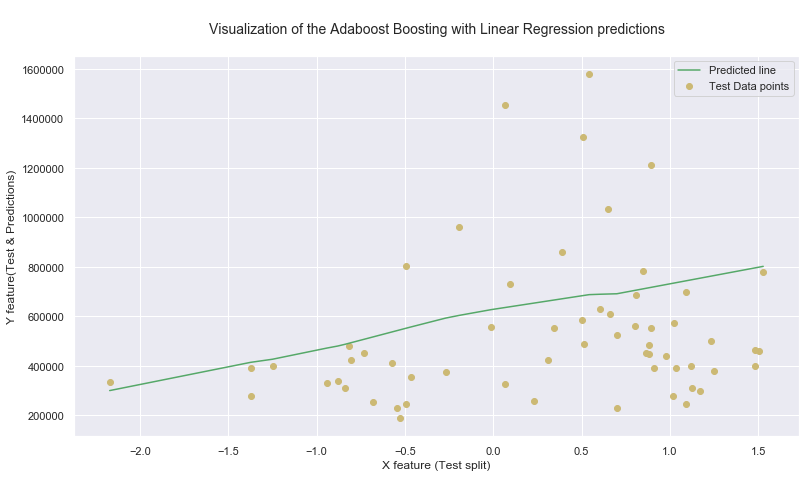

In [537]:
X_b = X_train[:60,14].reshape(-1,1)
y_b = y_train[:60]
ada1 = AdaBoostRegressor(LinearRegression(), learning_rate=0.05, n_estimators=50, loss= "linear", random_state=0)
ada1.fit(X_b, y_b)
cm=pd.DataFrame({'x':X_test[:60,14].tolist(),'y':y_test[:60].tolist()}).sort_values(by='x')
y_predict =ada1.predict(cm['x'].values.reshape(-1,1))
plt.figure(figsize=(13,7))
plt.plot(cm['x'].tolist(), y_predict, c = 'g',label='Predicted line')
plt.scatter(cm['x'].tolist(), cm['y'].tolist(),label='Test Data points', c='y')
plt.title('\nVisualization of the Adaboost Boosting with Linear Regression predictions\n',fontsize=14)
plt.xlabel('X feature (Test split)',fontsize=12)
plt.ylabel('Y feature(Test & Predictions)',fontsize=12)
plt.legend()
plt.show()

<div class="alert alert-block alert-danger">

From the above results we can see that the Adaboost Boosting with Linear Regression model yields the best results when `learning_rate = 0.05`, `n_estimators = 50`, and `loss = linear`, which leads to the best R<sup>2</sup> score of `0.628448`.
<div>

Decision Tree Regression

In [506]:
from sklearn.ensemble import AdaBoostRegressor

grid = {
    'learning_rate':[0.05, 0.1, 1],
    'n_estimators': [50, 150, 300],
    'loss': ["linear", "square"]}

ada_dtree = GridSearchCV(AdaBoostRegressor(LinearRegression()), grid, return_train_score=True, cv=6, n_jobs=-1)
ada_dtree.fit(X_train, y_train)

GridSearchCV(cv=6, error_score=nan,
             estimator=AdaBoostRegressor(base_estimator=LinearRegression(copy_X=True,
                                                                         fit_intercept=True,
                                                                         n_jobs=None,
                                                                         normalize=False),
                                         learning_rate=1.0, loss='linear',
                                         n_estimators=50, random_state=None),
             iid='deprecated', n_jobs=-1,
             param_grid={'learning_rate': [0.05, 0.1, 1],
                         'loss': ['linear', 'square'],
                         'n_estimators': [50, 150, 300]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring=None, verbose=0)

In [507]:
ada_dtree.score(X_test, y_test)
#R2 score

0.624180789765645

In [508]:
print(f'Best parameters: {ada_dtree.best_params_}')
print(f'Best cross-validation score: {ada_dtree.best_score_}')
#Grid Search to find the best scaling parameter and mean testing score

Best parameters: {'learning_rate': 0.05, 'loss': 'linear', 'n_estimators': 50}
Best cross-validation score: 0.6110921034425133


In [509]:
result12=pd.DataFrame(ada_dtree.cv_results_)
result12.head(6)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_loss,param_n_estimators,params,split0_test_score,split1_test_score,...,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,split5_train_score,mean_train_score,std_train_score
0,0.796417,0.157708,0.014848,0.000436,0.05,linear,50,"{'learning_rate': 0.05, 'loss': 'linear', 'n_e...",0.674390,0.507848,...,0.052174,1,0.646246,0.633449,0.624106,0.614881,0.619731,0.608400,0.624469,0.012434
1,1.738153,0.063665,0.047153,0.000990,0.05,linear,150,"{'learning_rate': 0.05, 'loss': 'linear', 'n_e...",0.575990,0.288318,...,0.089270,4,0.503720,0.481067,0.478462,0.448262,0.488998,0.466600,0.477852,0.017351
2,2.711216,0.174261,0.082276,0.006723,0.05,linear,300,"{'learning_rate': 0.05, 'loss': 'linear', 'n_e...",0.550799,0.240208,...,0.098261,6,0.473506,0.443098,0.459766,0.402293,0.452922,0.401483,0.438845,0.027650
3,0.561195,0.014199,0.014095,0.002684,0.05,square,50,"{'learning_rate': 0.05, 'loss': 'square', 'n_e...",0.616088,0.374620,...,0.077104,2,0.554322,0.548935,0.507465,0.517325,0.534986,0.526885,0.531653,0.016516
4,1.662777,0.024627,0.049088,0.001955,0.05,square,150,"{'learning_rate': 0.05, 'loss': 'square', 'n_e...",0.451916,0.160339,...,0.102692,12,0.354996,0.377557,0.413165,0.331563,0.375584,0.355578,0.368074,0.025298
5,2.267886,0.204772,0.071014,0.005135,0.05,square,300,"{'learning_rate': 0.05, 'loss': 'square', 'n_e...",0.406311,0.099213,...,0.116345,14,0.301516,0.325958,0.390572,0.306654,0.311952,0.349011,0.330944,0.030885


In [516]:
pred = ada_dtree.predict(X_test)
print('\nFor learning rate =',result12['param_learning_rate'][ada_dtree.best_index_],', loss =',result12['param_loss'][ada_dtree.best_index_], ', n_estimators =', result12['param_n_estimators'][ada_dtree.best_index_])
print('\n\t• Cross validation Training score mean: ',result12['mean_train_score'][ada_dtree.best_index_])
print('\n\t• Cross validation Testing score mean: ' ,ada_dtree.best_score_)
print('\n\t• R2 Score: ',r2_score(y_test,pred))
print('\n\t• Root Mean Squared Error: ', np.sqrt(mean_squared_error(y_test, pred)))
print('----------------------------------------------------------------------------')


For learning rate = 0.05 , loss = linear , n_estimators = 50

	• Cross validation Training score mean:  0.6244690313716655

	• Cross validation Testing score mean:  0.6110921034425133

	• R2 Score:  0.624180789765645

	• Root Mean Squared Error:  227149.626536459
----------------------------------------------------------------------------


<div class="alert alert-block alert-success">Let's visualize the best fitted line by the  Adaboost Boosting with Decision Tree

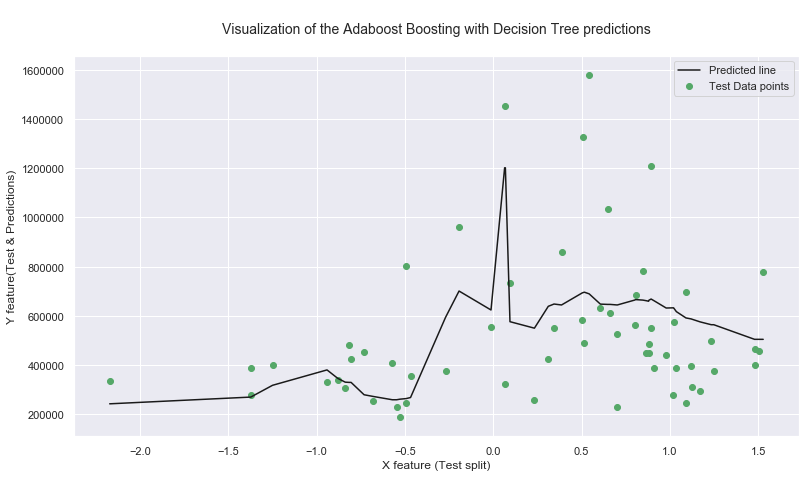

In [533]:
X_b = X_train[:60,14].reshape(-1,1)
y_b = y_train[:60]
ada2 = AdaBoostRegressor(knn_rg, learning_rate=0.05, n_estimators=50, loss= "linear", random_state=0)
ada2.fit(X_b, y_b)
cm=pd.DataFrame({'x':X_test[:60,14].tolist(),'y':y_test[:60].tolist()}).sort_values(by='x')
y_predict =ada2.predict(cm['x'].values.reshape(-1,1))
plt.figure(figsize=(13,7))
plt.plot(cm['x'].tolist(), y_predict, c = 'k',label='Predicted line')
plt.scatter(cm['x'].tolist(), cm['y'].tolist(),label='Test Data points', c='g')
plt.title('\nVisualization of the Adaboost Boosting with Decision Tree predictions\n',fontsize=14)
plt.xlabel('X feature (Test split)',fontsize=12)
plt.ylabel('Y feature(Test & Predictions)',fontsize=12)
plt.legend()
plt.show()

<div class="alert alert-block alert-danger">

From the above results we can see that the Adaboost Boosting with Decision Tree model yields the best results when `learning_rate = 0.05`, `n_estimators = 50`, and `loss = linear`, which leads to the best R<sup>2</sup> score of `0.62418`.
<div>

<div class="alert alert-block alert-info">
<b><font size="4">Gradient Boosting Regression</font></b>  
<div>

In [108]:
from sklearn.ensemble import GradientBoostingRegressor

grid = {
    'learning_rate':[0.05, 0.1, 1],
    'n_estimators': [50, 100, 200],
    'max_depth':[1, 5, 10],
    'max_features':[2, 5, 10]}

gbrg = GridSearchCV(GradientBoostingRegressor(random_state = 0), grid, return_train_score=True, cv=6, n_jobs=-1)
gbrg.fit(X_train, y_train)

GridSearchCV(cv=6, error_score=nan,
             estimator=GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0,
                                                 criterion='friedman_mse',
                                                 init=None, learning_rate=0.1,
                                                 loss='ls', max_depth=3,
                                                 max_features=None,
                                                 max_leaf_nodes=None,
                                                 min_impurity_decrease=0.0,
                                                 min_impurity_split=None,
                                                 min_samples_leaf=1,
                                                 min_samples_split=2,
                                                 min_weight_fraction_leaf=0.0,
                                                 n_estimators=100,
                                                 n_iter_no_change=None,
                 

In [124]:
gbrg.score(X_test, y_test)
#R2 score

0.9029181007552625

In [489]:
print(f'Best parameters: {gbrg.best_params_}')
print(f'Best cross-validation score: {gbrg.best_score_}')
#Grid Search to find the best scaling parameter and mean testing score

Best parameters: {'learning_rate': 0.1, 'max_depth': 5, 'max_features': 10, 'n_estimators': 200}
Best cross-validation score: 0.8840140458366789


In [490]:
result13=pd.DataFrame(gbrg.cv_results_)
result13.head(6)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_max_depth,param_max_features,param_n_estimators,params,split0_test_score,...,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,split5_train_score,mean_train_score,std_train_score
0,0.128387,0.001572,0.002345,0.000067,0.05,1,2,50,"{'learning_rate': 0.05, 'max_depth': 1, 'max_f...",0.432989,...,0.018507,81,0.461078,0.471058,0.459391,0.461802,0.459727,0.461246,0.462384,0.003970
1,0.257518,0.014367,0.003845,0.001206,0.05,1,2,100,"{'learning_rate': 0.05, 'max_depth': 1, 'max_f...",0.588656,...,0.017031,74,0.618682,0.629159,0.616653,0.615762,0.615362,0.617869,0.618914,0.004722
2,0.746422,0.147419,0.007256,0.002573,0.05,1,2,200,"{'learning_rate': 0.05, 'max_depth': 1, 'max_f...",0.691007,...,0.021078,62,0.718597,0.728602,0.720262,0.713682,0.716235,0.716814,0.719032,0.004738
3,0.291243,0.052478,0.002351,0.000423,0.05,1,5,50,"{'learning_rate': 0.05, 'max_depth': 1, 'max_f...",0.511032,...,0.015721,80,0.534054,0.543848,0.534698,0.533715,0.533299,0.536248,0.535977,0.003644
4,0.545107,0.081449,0.005605,0.004070,0.05,1,5,100,"{'learning_rate': 0.05, 'max_depth': 1, 'max_f...",0.641756,...,0.014529,69,0.666334,0.675825,0.664498,0.661504,0.663901,0.666036,0.666350,0.004524
5,0.993247,0.090805,0.005494,0.000451,0.05,1,5,200,"{'learning_rate': 0.05, 'max_depth': 1, 'max_f...",0.720744,...,0.017814,56,0.743097,0.752945,0.745106,0.739408,0.743607,0.742819,0.744497,0.004147


In [127]:
pred = gbrg.predict(X_test)
print('\nFor learning rate =',result13['param_learning_rate'][gbrg.best_index_],'\nFor max depth =',result13['param_max_depth'][gbrg.best_index_], '\nFor max features =', result13['param_max_features'][gbrg.best_index_], '\nFor max estimators =', result13['param_n_estimators'][gbrg.best_index_])
print('\n\t• Cross validation Training score mean: ',result13['mean_train_score'][gbrg.best_index_])
print('\n\t• Cross validation Testing score mean: ' ,gbrg.best_score_)
print('\n\t• R2 Score: ',r2_score(y_test,pred))
print('\n\t• Root Mean Squared Error: ', np.sqrt(mean_squared_error(y_test, pred)))
print('----------------------------------------------------------------------------')


For learning rate = 0.1 
For max depth = 5 
For max features = 10 
For max estimators = 200

	• Cross validation Training score mean:  0.9624110319444855

	• Cross validation Testing score mean:  0.8840140458366789

	• R2 Score:  0.9029181007552626

	• Root Mean Squared Error:  115449.3976420463
----------------------------------------------------------------------------


<div class="alert alert-block alert-success">Let's visualize the best fitted line by the  Gradient Boosting Model 

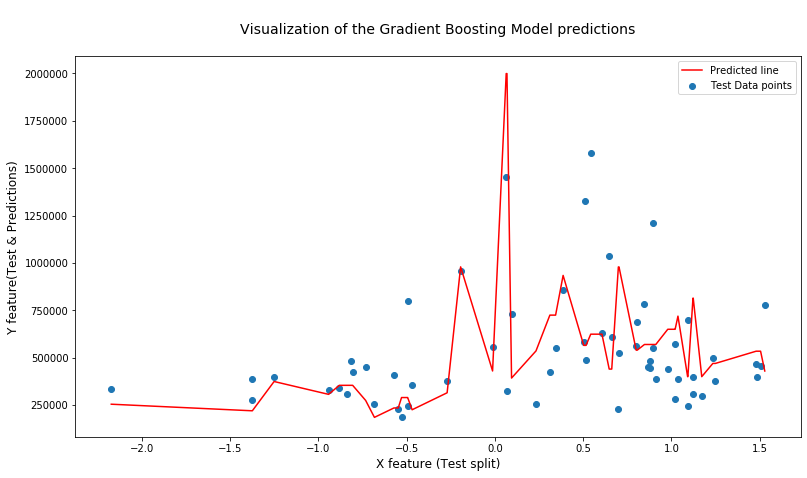

In [131]:
X_b = X_train[:60,14].reshape(-1,1)
y_b = y_train[:60]
gb = GradientBoostingRegressor(learning_rate=0.1, max_depth=5, n_estimators=200, random_state=0)
gb.fit(X_b, y_b)
cm=pd.DataFrame({'x':X_test[:60,14].tolist(),'y':y_test[:60].tolist()}).sort_values(by='x')
y_predict =gb.predict(cm['x'].values.reshape(-1,1))
plt.figure(figsize=(13,7))
plt.plot(cm['x'].tolist(), y_predict, c = 'r',label='Predicted line')
plt.scatter(cm['x'].tolist(), cm['y'].tolist(),label='Test Data points')
plt.title('\nVisualization of the Gradient Boosting Model predictions\n',fontsize=14)
plt.xlabel('X feature (Test split)',fontsize=12)
plt.ylabel('Y feature(Test & Predictions)',fontsize=12)
plt.legend()
plt.show()

<div class="alert alert-block alert-danger">

From the above results we can see that the Gradient Boosting yields the best results when `learning rate = 0.1`, `max depth = 5`, `max features = 10`, and `n_estimators = 200`, which leads to the best R<sup>2</sup> score of `0.902918`. This is the best model amog all so far. 
<div>

<div class="alert alert-block alert-info">
<b><font size="5">Dimensionality Reduction</font></b>  
<div>

In [180]:
from sklearn.decomposition import PCA
pca = PCA(n_components=0.95)
X_train_reduced = pca.fit_transform(X_train)
X_test_reduced = pca.transform(X_test)
pca.n_components_
# 14 principal components is explained by 95% of the variance 

14

<div class="alert alert-block alert-info">
<b><font size="4">  KNN Regressor after PCA</font></b>

In [181]:
from sklearn.neighbors import KNeighborsRegressor
knnparameters = {'n_neighbors':range(3,12)}
reg = GridSearchCV(KNeighborsRegressor(), knnparameters,return_train_score=True, cv= 6, n_jobs=-1)
reg.fit(X_train_reduced, y_train)
#6-fold cross validation instead of default 5

GridSearchCV(cv=6, error_score=nan,
             estimator=KNeighborsRegressor(algorithm='auto', leaf_size=30,
                                           metric='minkowski',
                                           metric_params=None, n_jobs=None,
                                           n_neighbors=5, p=2,
                                           weights='uniform'),
             iid='deprecated', n_jobs=-1,
             param_grid={'n_neighbors': range(3, 12)}, pre_dispatch='2*n_jobs',
             refit=True, return_train_score=True, scoring=None, verbose=0)

In [190]:
reg.score(X_test_reduced, y_test)
#R2 score

0.7784635637868078

In [191]:
print(f'Best parameters: {reg.best_params_}')
print(f'Best cross-validation score: {reg.best_score_}')
#Grid Search to find the best scaling parameter and mean testing score

Best parameters: {'n_neighbors': 6}
Best cross-validation score: 0.785919929617458


In [491]:
results=pd.DataFrame(reg.cv_results_)

In [193]:
pred = reg.predict(X_test_reduced)
print('\nFor n_neighbors=',results['params'][reg.best_index_])
print('\n\t• Cross validation Training score mean: ',results['mean_train_score'][reg.best_index_])
print('\n\t• Cross validation Testing score mean: ' ,reg.best_score_)
print('\n\t• R2 Score: ',r2_score(y_test,pred))
print('\n\t• Root Mean Squared Error: ', np.sqrt(mean_squared_error(y_test, pred)))
print('----------------------------------------------------------------------------')


For n_neighbors= {'n_neighbors': 6}

	• Cross validation Training score mean:  0.8494831846877858

	• Cross validation Testing score mean:  0.785919929617458

	• R2 Score:  0.7784635637868078

	• Root Mean Squared Error:  174399.45437517072
----------------------------------------------------------------------------


<div class="alert alert-block alert-success">     

    
From the above results we can see that the KNN model yields the best results when `K = 6` which leads to the best R<sup>2</sup> score of `0.778463`
<div>

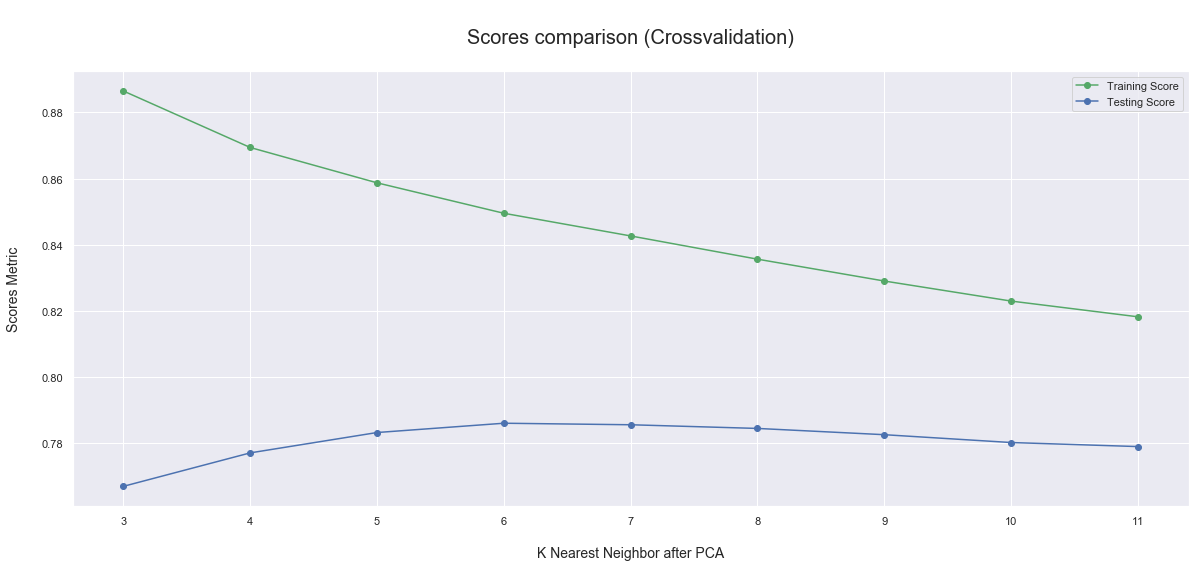

In [485]:
plt.figure(figsize=(20,8))
x_axis = list(range(3,12))
plt.plot(x_axis, results['mean_train_score'], c = 'g', label = 'Training Score',marker='o')
plt.plot(x_axis, results['mean_test_score'], c = 'b', label = 'Testing Score',marker='o')
plt.legend(loc='best')
plt.title('\nScores comparison (Crossvalidation)\n',fontsize=20)
plt.xlabel('\nK Nearest Neighbor after PCA',fontsize=14)
plt.ylabel('Scores Metric\n',fontsize=14)
sns.set()
plt.show();

Lets analyze the Crossvalidation testing score closely as we have to choose the best score

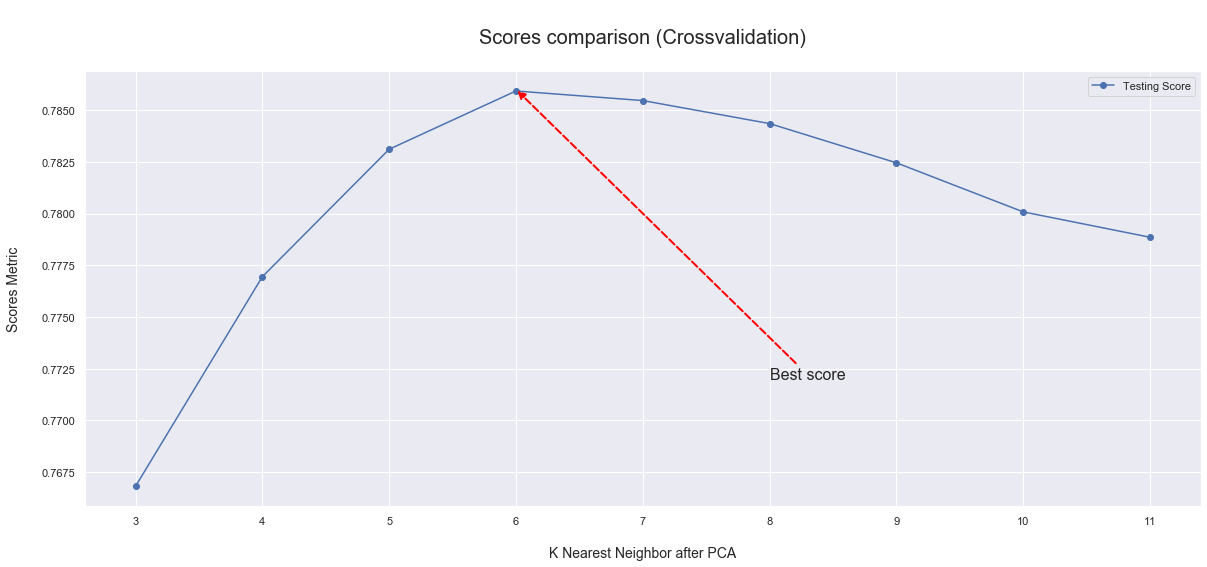

In [492]:
plt.figure(figsize=(20,8))
x_axis = list(range(3,12))
plt.plot(x_axis, results['mean_test_score'], c = 'b', label = 'Testing Score',marker='o')
plt.annotate("Best score",fontsize=16,xy=(6, 0.786),xytext=(8, 0.772), arrowprops=dict(arrowstyle="-|>",connectionstyle="arc3",facecolor="red",edgecolor="red",linestyle='--',linewidth=2))
plt.legend(loc='best')
plt.title('\nScores comparison (Crossvalidation)\n',fontsize=20)
plt.xlabel('\nK Nearest Neighbor after PCA',fontsize=14)
plt.ylabel('Scores Metric\n',fontsize=14)
plt.show();

<div class="alert alert-block alert-warning">
Let's Visualize the plot of the best fit line by the KNN model after PCA below for a sample of data with only one x variable and y variable for simplicity:
    <div>

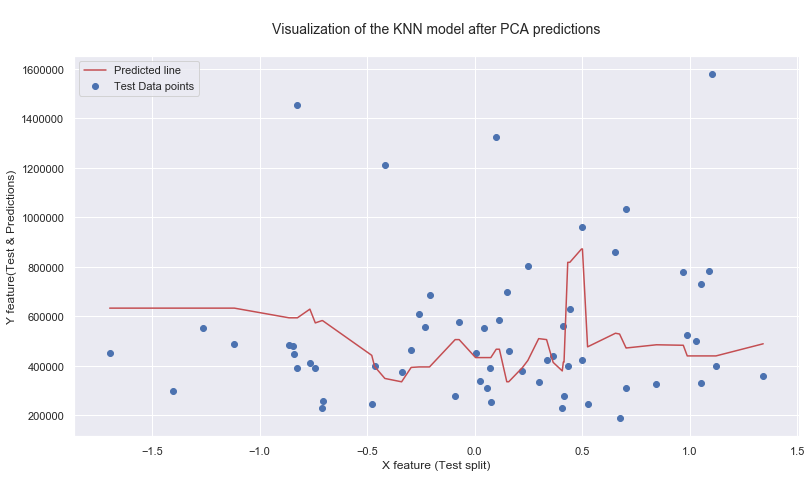

In [493]:
X_b = X_train_reduced[:60,10].reshape(-1,1)
y_b = y_train[:60]
knn_reg = KNeighborsRegressor(5)
knn_reg.fit(X_b, y_b)
cm=pd.DataFrame({'x':X_test_reduced[:60,10].tolist(),'y':y_test[:60].tolist()}).sort_values(by='x')
y_predict = knn_reg.predict(cm['x'].values.reshape(-1,1))
plt.figure(figsize=(13,7))
plt.plot(cm['x'].tolist(), y_predict, c = 'r',label='Predicted line')
plt.scatter(cm['x'].tolist(), cm['y'].tolist(),label='Test Data points')
plt.title('\nVisualization of the KNN model after PCA predictions\n',fontsize=14)
plt.xlabel('X feature (Test split)',fontsize=12)
plt.ylabel('Y feature(Test & Predictions)',fontsize=12)
plt.legend()
plt.show()

<div class="alert alert-block alert-info">
<b><font size="4">  Linear Regression after PCA</font></b>

In [197]:
from sklearn.linear_model import LinearRegression
lnreg=LinearRegression()
lnreg.fit(X_train_reduced, y_train)
print(f'\n\n Linear Regression Model and the metrics :\n')
print('\t• Training score of the Linear Regression Model is :',lnreg.score(X_train_reduced, y_train))
print('\n\t• Testing score of the Linear Regression Model is :',lnreg.score(X_test_reduced, y_test))
pred= lnreg.predict(X_test_reduced)
print(f'\n\t• Root Mean Squared Error: {np.sqrt(mean_squared_error(y_test, pred))} \n\n\t• R2 Score: {r2_score(y_test,pred)}')



 Linear Regression Model and the metrics :

	• Training score of the Linear Regression Model is : 0.6796368994885679

	• Testing score of the Linear Regression Model is : 0.658828668039517

	• Root Mean Squared Error: 216425.68703220217 

	• R2 Score: 0.658828668039517


<div class="alert alert-block alert-success">     

    
From the above results we can see that the simple linear model after PCA yields 
    R<sup>2</sup> score of `0.658828`. The test score is relatively close to the training score.
<div>

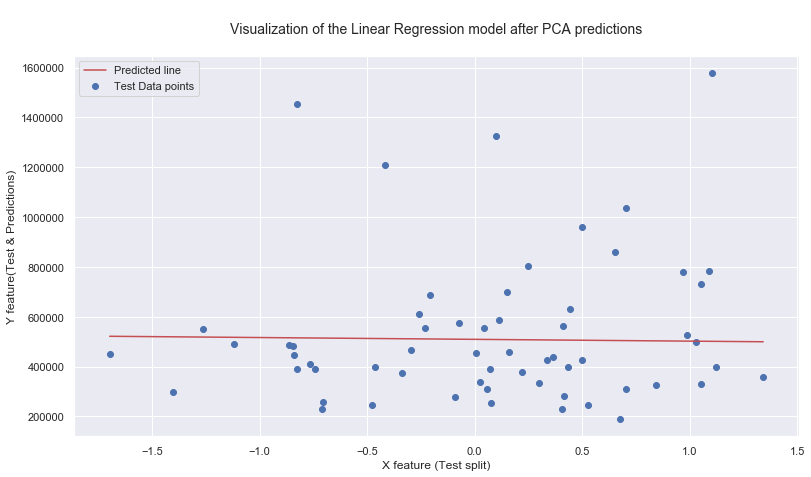

In [494]:
X_b = X_train_reduced[:60,10].reshape(-1,1)
y_b = y_train[:60]
lnreg=LinearRegression()
lnreg.fit(X_b, y_b)
cm=pd.DataFrame({'x':X_test_reduced[:60,10].tolist(),'y':y_test[:60].tolist()}).sort_values(by='x')
y_predict = lnreg.predict(cm['x'].values.reshape(-1,1))
plt.figure(figsize=(13,7))
plt.plot(cm['x'].tolist(), y_predict, c = 'r',label='Predicted line')
plt.scatter(cm['x'].tolist(), cm['y'].tolist(),label='Test Data points')
plt.title('\nVisualization of the Linear Regression model after PCA predictions\n',fontsize=14)
plt.xlabel('X feature (Test split)',fontsize=12)
plt.ylabel('Y feature(Test & Predictions)',fontsize=12)
plt.legend()
plt.show()

<div class="alert alert-block alert-info">
<b><font size="4">  Ridge after PCA</font></b>

In [199]:
from sklearn.linear_model import Ridge

In [200]:
parameters = {'alpha': [0.01,0.1,1,20,35,50,70,100,105,110,115,120]}
ridge_reg = GridSearchCV(Ridge(random_state=0), parameters,return_train_score=True, cv=6, n_jobs=-1)
ridge_reg.fit(X_train_reduced, y_train)

GridSearchCV(cv=6, error_score=nan,
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=0,
                             solver='auto', tol=0.001),
             iid='deprecated', n_jobs=-1,
             param_grid={'alpha': [0.01, 0.1, 1, 20, 35, 50, 70, 100, 105, 110,
                                   115, 120]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring=None, verbose=0)

In [201]:
ridge_reg.score(X_test_reduced, y_test)
#R2 score

0.6586554986669678

In [202]:
print(f'Best parameters: {ridge_reg.best_params_}')
print(f'Best cross-validation score: {ridge_reg.best_score_}')
#Grid Search to find the best scaling parameter and mean testing score

Best parameters: {'alpha': 120}
Best cross-validation score: 0.6752794475149785


In [495]:
result=pd.DataFrame(ridge_reg.cv_results_)

In [204]:
pred = ridge_reg.predict(X_test_reduced)
print('\nFor alpha =',result['param_alpha'][ridge_reg.best_index_])
print('\n\t• Cross validation Training score mean: ',result['mean_train_score'][ridge_reg.best_index_])
print('\n\t• Cross validation Testing score mean: ' ,ridge_reg.best_score_)
print('\n\t• R2 Score: ',r2_score(y_test,pred))
print('\n\t• Root Mean Squared Error: ', np.sqrt(mean_squared_error(y_test, pred)))
print('----------------------------------------------------------------------------')


For alpha = 120

	• Cross validation Training score mean:  0.679855379789605

	• Cross validation Testing score mean:  0.6752794475149785

	• R2 Score:  0.6586554986669677

	• Root Mean Squared Error:  216480.60598696067
----------------------------------------------------------------------------


<div class="alert alert-block alert-danger">     

From the above results we can see that the Ridge model after PCA yields the best results when `alpha =120` which leads to the best R<sup>2</sup> score of `0.658655` and it's worse than simple linear regression. As alpha become larger, the r2 score is getting near to the result of simple linear regression. In addition, the test score is relatively close to the training score, which indicates that there's no need to regularize the model.
<div>

<div class="alert alert-block alert-info">
<b><font size="4">  LASSO after PCA </font></b>

In [205]:
from sklearn.linear_model import Lasso

In [206]:
params = {'alpha': [0.001,0.01,0.1, 1, 20, 40, 60, 75 ,80, 85, 90, 100, 120]}
lasso_reg = GridSearchCV(Lasso(random_state=0), params,return_train_score=True, cv=6, n_jobs=-1)
lasso_reg.fit(X_train_reduced, y_train)

GridSearchCV(cv=6, error_score=nan,
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=0,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'alpha': [0.001, 0.01, 0.1, 1, 20, 40, 60, 75, 80, 85,
                                   90, 100, 120]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring=None, verbose=0)

In [207]:
lasso_reg.score(X_test_reduced, y_test)
#R2 score

0.6587922139338316

In [208]:
print(f'Best parameters: {lasso_reg.best_params_}')
print(f'Best cross-validation score: {lasso_reg.best_score_}')
#Grid Search to find the best scaling parameter and mean testing score

Best parameters: {'alpha': 120}
Best cross-validation score: 0.6752211471300603


In [496]:
result1=pd.DataFrame(lasso_reg.cv_results_)

In [211]:
preds = lasso_reg.predict(X_test_reduced)
print('\nFor alpha =',result1['param_alpha'][lasso_reg.best_index_])
print('\n\t• Cross validation Training score mean: ',result1['mean_train_score'][lasso_reg.best_index_])
print('\n\t• Cross validation Testing score mean: ' ,lasso_reg.best_score_)
print('\n\t• R2 Score: ',r2_score(y_test,preds))
print('\n\t• Root Mean Squared Error: ', np.sqrt(mean_squared_error(y_test, preds)))
print('----------------------------------------------------------------------------')


For alpha = 120

	• Cross validation Training score mean:  0.6798774735935257

	• Cross validation Testing score mean:  0.6752211471300603

	• R2 Score:  0.6587922139338316

	• Root Mean Squared Error:  216437.2492494659
----------------------------------------------------------------------------


<div class="alert alert-block alert-danger">     

From the above results we can see that the Lasso model after PCA yields the best results when `alpha = 120` which leads to the best R<sup>2</sup> score of `0.658792` and it's about the same as simple linear regression. 
<div>

<div class="alert alert-block alert-info">
<b><font size="4">  Polynomial Regression after PCA </font></b>

In [212]:
from sklearn.preprocessing import PolynomialFeatures

In [213]:
train_score_list = []
test_score_list = []

for n in range(1,4): 
    poly = PolynomialFeatures(n)
    X_train_poly = poly.fit_transform(X_train_reduced)
    X_test_poly = poly.transform(X_test_reduced)
    print('\nFor degree =', n)
    lnreg.fit(X_train_poly,y_train)
    y_pred=lnreg.predict(X_test_poly)
    train_score_list.append(lnreg.score(X_train_poly,y_train))
    test_score_list.append(lnreg.score(X_test_poly, y_test))
    print('\n\t• Training score: ',train_score_list[-1])
    print('\n\t• Testing score: ',test_score_list[-1])
    print(f'\n\t• Root Mean Squared Error: {np.sqrt(mean_squared_error(y_test, y_pred))} \n\n\t• R2 Score: {r2_score(y_test,y_pred)}')
    print('----------------------------------------------------------------------------')


For degree = 1

	• Training score:  0.6796368994885679

	• Testing score:  0.658828668039517

	• Root Mean Squared Error: 216425.6870322021 

	• R2 Score: 0.658828668039517
----------------------------------------------------------------------------

For degree = 2

	• Training score:  0.8143859585630053

	• Testing score:  0.8089574731745355

	• Root Mean Squared Error: 161952.46633960915 

	• R2 Score: 0.8089574731745355
----------------------------------------------------------------------------

For degree = 3

	• Training score:  0.886789969067011

	• Testing score:  0.3495016203464746

	• Root Mean Squared Error: 298844.762509182 

	• R2 Score: 0.3495016203464746
----------------------------------------------------------------------------


<div class="alert alert-block alert-danger">

From the above results we can see that the Polynomial Regression model after PCA yields the best results when `degree = 2`which leads to the best R<sup>2</sup> score of `0.808957` which is the maximum score of all the models we  build. 
<div>

<div class="alert alert-block alert-success">Let's visualize the best fitted line by the Polynomial Model after PCA

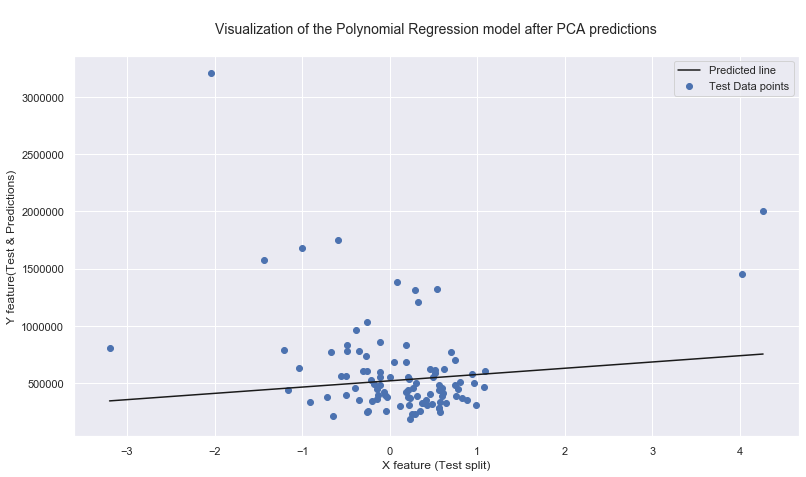

In [505]:
X_b = X_train_poly[:100,10].reshape(-1,1)
y_b = y_train[:100]
lnreg.fit(X_b, y_b)
cm=pd.DataFrame({'x':X_test_poly[:100,10].tolist(),'y':y_test[:100].tolist()}).sort_values(by='x')
y_predict = lnreg.predict(cm['x'].values.reshape(-1,1))
plt.figure(figsize=(13,7))
plt.plot(cm['x'].tolist(), y_predict, c = 'k',label='Predicted line')
plt.scatter(cm['x'].tolist(), cm['y'].tolist(),label='Test Data points')
plt.title('\nVisualization of the Polynomial Regression model after PCA predictions\n',fontsize=14)
plt.xlabel('X feature (Test split)',fontsize=12)
plt.ylabel('Y feature(Test & Predictions)',fontsize=12)
plt.legend()
plt.show()

<div class="alert alert-block alert-info">
<b><font size="4">  Linear Support Vector Regressor after PCA</font></b>

In [215]:
from sklearn.svm import LinearSVR

In [216]:
params_C = {'C': [0.01,0.1,1,10,100,1000,8450,9000]}
svreg = GridSearchCV(LinearSVR(random_state=0), params_C,return_train_score=True, cv=6, n_jobs=-1)
svreg.fit(X_train_reduced, y_train)

GridSearchCV(cv=6, error_score=nan,
             estimator=LinearSVR(C=1.0, dual=True, epsilon=0.0,
                                 fit_intercept=True, intercept_scaling=1.0,
                                 loss='epsilon_insensitive', max_iter=1000,
                                 random_state=0, tol=0.0001, verbose=0),
             iid='deprecated', n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 1, 10, 100, 1000, 8450, 9000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring=None, verbose=0)

In [217]:
svreg.score(X_test_reduced, y_test)
#R2 score

0.6078382513677633

In [218]:
print(f'Best parameters: {svreg.best_params_}')
print(f'Best cross-validation score: {svreg.best_score_}')
#Grid Search to find the best scaling parameter and mean testing score

Best parameters: {'C': 8450}
Best cross-validation score: 0.6310627028029533


In [497]:
result3=pd.DataFrame(svreg.cv_results_)

In [220]:
y_preds = svreg.predict(X_test_reduced)
print('\nFor C =',result3['param_C'][svreg.best_index_])
print('\n\t• Cross validation Training score mean: ',result3['mean_train_score'][svreg.best_index_])
print('\n\t• Cross validation Testing score mean: ' ,svreg.best_score_)
print('\n\t• R2 Score: ',r2_score(y_test,y_preds))
print('\n\t• Root Mean Squared Error: ', np.sqrt(mean_squared_error(y_test, y_preds)))
print('----------------------------------------------------------------------------')


For C = 8450

	• Cross validation Training score mean:  0.6327075473511173

	• Cross validation Testing score mean:  0.6310627028029533

	• R2 Score:  0.6078382513677633

	• Root Mean Squared Error:  232035.88478292822
----------------------------------------------------------------------------


<div class="alert alert-block alert-success">Let's visualize the best fitted line by the Linear SVR Model after PCA

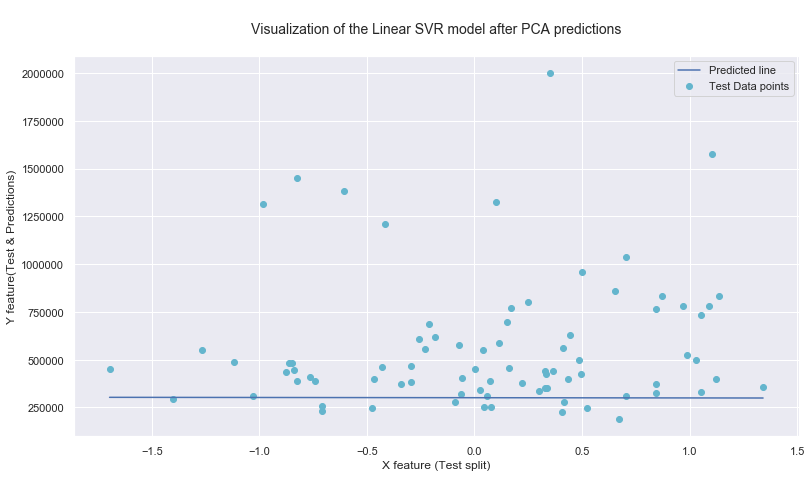

In [504]:
X_b = X_train_reduced[:80,10].reshape(-1,1)
y_b = y_train[:80]
svregt = LinearSVR(random_state=0,C=8450)
svregt.fit(X_b, y_b)
cm=pd.DataFrame({'x':X_test_reduced[:80,10].tolist(),'y':y_test[:80].tolist()}).sort_values(by='x')
y_predict = svregt.predict(cm['x'].values.reshape(-1,1))
plt.figure(figsize=(13,7))
plt.plot(cm['x'].tolist(), y_predict, c = 'b',label='Predicted line')
plt.scatter(cm['x'].tolist(), cm['y'].tolist(),label='Test Data points',c='c')
plt.title('\nVisualization of the Linear SVR model after PCA predictions\n',fontsize=14)
plt.xlabel('X feature (Test split)',fontsize=12)
plt.ylabel('Y feature(Test & Predictions)',fontsize=12)
plt.legend()
plt.show()

<div class="alert alert-block alert-danger">

From the above results we can see that the Linear Support Vector Regressor model after PCA yields the best results when `C = 8450`which leads to the best R<sup>2</sup> score of `0.607838` 
<div>

<div class="alert alert-block alert-info">
<b><font size="4">  SVM- Kernal RBF (Radial Bias Function) Regressor after PCA </font></b>

In [455]:
from sklearn.svm import SVR

In [456]:
param_grid = {'C': [0.01, 0.1, 1, 10, 1000, 5000],
              'gamma': [0.0001, 0.001, 0.1, 10, 1000]}
svregrbf = GridSearchCV(SVR(kernel='rbf'), param_grid, return_train_score=True, cv=6, n_jobs=-1)
svregrbf.fit(X_train_reduced, y_train)

GridSearchCV(cv=6, error_score=nan,
             estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                           epsilon=0.1, gamma='scale', kernel='rbf',
                           max_iter=-1, shrinking=True, tol=0.001,
                           verbose=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 1, 10, 1000, 5000],
                         'gamma': [0.0001, 0.001, 0.1, 10, 1000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring=None, verbose=0)

In [457]:
svregrbf.score(X_test_reduced, y_test)
#R2 score

0.4475922487453138

In [458]:
print(f'Best parameters: {svregrbf.best_params_}')
print(f'Best cross-validation score: {svregrbf.best_score_}')
#Grid Search to find the best scaling parameter and mean testing score

Best parameters: {'C': 5000, 'gamma': 0.001}
Best cross-validation score: 0.4390274840897743


In [498]:
result4=pd.DataFrame(svregrbf.cv_results_)

In [460]:
y_preds = svregrbf.predict(X_test_reduced)
print('\nFor C =',result4['param_C'][svregrbf.best_index_],'\nFor gamma =',result4['param_gamma'][svregrbf.best_index_])
print('\n\t• Cross validation Training score mean: ',result4['mean_train_score'][svregrbf.best_index_])
print('\n\t• Cross validation Testing score mean: ' ,svregrbf.best_score_)
print('\n\t• R2 Score: ',r2_score(y_test,y_preds))
print('\n\t• Root Mean Squared Error: ', np.sqrt(mean_squared_error(y_test, y_preds)))
print('----------------------------------------------------------------------------')


For C = 5000 
For gamma = 0.001

	• Cross validation Training score mean:  0.43737871457832495

	• Cross validation Testing score mean:  0.4390274840897743

	• R2 Score:  0.4475922487453138

	• Root Mean Squared Error:  275392.698285591
----------------------------------------------------------------------------


<div class="alert alert-block alert-success">Let's visualize the best fitted line by the SVM RBF model after PCA

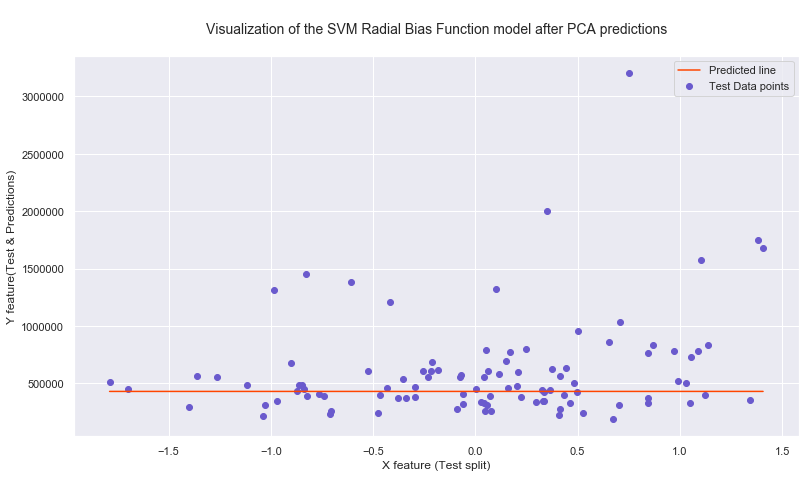

In [503]:
X_b = X_train_reduced[:100,10].reshape(-1,1)
y_b = y_train[:100]
svregt = SVR(kernel='rbf',gamma=0.001,C=5000)
svregt.fit(X_b, y_b)
cm=pd.DataFrame({'x':X_test_reduced[:100,10].tolist(),'y':y_test[:100].tolist()}).sort_values(by='x')
y_predict = svregt.predict(cm['x'].values.reshape(-1,1))
plt.figure(figsize=(13,7))
plt.plot(cm['x'].tolist(), y_predict, c = 'orangered',label='Predicted line')
plt.scatter(cm['x'].tolist(), cm['y'].tolist(),label='Test Data points',c='slateblue')
plt.title('\nVisualization of the SVM Radial Bias Function model after PCA predictions\n',fontsize=14)
plt.xlabel('X feature (Test split)',fontsize=12)
plt.ylabel('Y feature(Test & Predictions)',fontsize=12)
plt.legend()
plt.show()

<div class="alert alert-block alert-danger">

From the above results we can see that the SVM RBF model after PCA yields the best results when `C = 5000` and `gamma = 0.001` which leads to the best R<sup>2</sup> score of `0.447592`. It indicates the chosen model does not follow the trend of the data.
<div>

<div class="alert alert-block alert-info">
<b><font size="4">  SVM- Kernal (Polynomial) Regressor after PCA </font></b>

In [448]:
from sklearn.svm import SVR

In [449]:
param_grids = {'C': [0.01,1,10,100,1000,5000],
              'degree': [1,3,5]}
svregpoly = GridSearchCV(SVR(kernel='poly'), param_grids ,return_train_score=True, cv=6, n_jobs=-1)
svregpoly.fit(X_train_reduced, y_train)

GridSearchCV(cv=6, error_score=nan,
             estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                           epsilon=0.1, gamma='scale', kernel='poly',
                           max_iter=-1, shrinking=True, tol=0.001,
                           verbose=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'C': [0.01, 1, 10, 100, 1000, 5000],
                         'degree': [1, 3, 5]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring=None, verbose=0)

In [450]:
svregpoly.score(X_test_reduced, y_test)
#R2 score

0.6775225345256422

In [451]:
print(f'Best parameters: {svregpoly.best_params_}')
print(f'Best cross-validation score: {svregpoly.best_score_}')
#Grid Search to find the best scaling parameter and mean testing score

Best parameters: {'C': 5000, 'degree': 3}
Best cross-validation score: 0.6276957278761329


In [499]:
result5=pd.DataFrame(svregpoly.cv_results_)

In [453]:
y_prediction = svregpoly.predict(X_test_reduced)
print('\nFor C =',result5['param_C'][svregpoly.best_index_],'\nFor degree =',result5['param_degree'][svregpoly.best_index_])
print('\n\t• Cross validation Training score mean: ',result5['mean_train_score'][svregpoly.best_index_])
print('\n\t• Cross validation Testing score mean: ' ,svregpoly.best_score_)
print('\n\t• R2 Score: ',r2_score(y_test,y_prediction))
print('\n\t• Root Mean Squared Error: ', np.sqrt(mean_squared_error(y_test, y_prediction)))
print('----------------------------------------------------------------------------')


For C = 5000 
For degree = 3

	• Cross validation Training score mean:  0.6883047786474387

	• Cross validation Testing score mean:  0.6276957278761329

	• R2 Score:  0.6775225345256422

	• Root Mean Squared Error:  210412.83371943817
----------------------------------------------------------------------------


<div class="alert alert-block alert-success">Let's visualize the best fitted line by the SVM Polynomial model after PCA

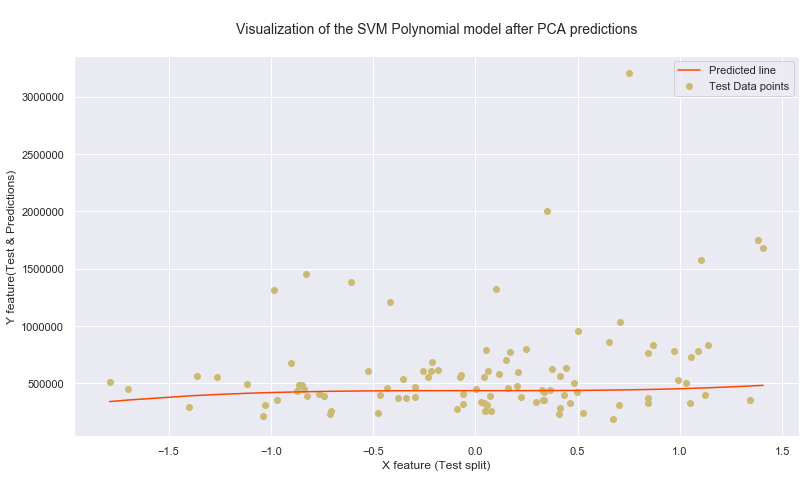

In [501]:
X_b = X_train_reduced[:100,10].reshape(-1,1)
y_b = y_train[:100]
svregt = SVR(kernel='poly',degree=3,C=5000)
svregt.fit(X_b, y_b)
cm=pd.DataFrame({'x':X_test_reduced[:100,10].tolist(),'y':y_test[:100].tolist()}).sort_values(by='x')
y_predict = svregt.predict(cm['x'].values.reshape(-1,1))
plt.figure(figsize=(13,7))
plt.plot(cm['x'].tolist(), y_predict, c = 'orangered',label='Predicted line')
plt.scatter(cm['x'].tolist(), cm['y'].tolist(),label='Test Data points',c='y')
plt.title('\nVisualization of the SVM Polynomial model after PCA predictions\n',fontsize=14)
plt.xlabel('X feature (Test split)',fontsize=12)
plt.ylabel('Y feature(Test & Predictions)',fontsize=12)
plt.legend()
plt.show()

<div class="alert alert-block alert-danger">

From the above results we can see that the SVM Polynomial model after PCA yields the best results when `C = 5000` and `degree = 3` which leads to the best R<sup>2</sup> score of `0.677522`. It indicates the chosen model does not follow the trend of the data.
<div>

<div class="alert alert-block alert-info">
<b><font size="4">  SVM- Kernal (Linear) Regressor after PCA</font></b>

In [441]:
from sklearn.svm import SVR

In [442]:
param_c = {'C': [0.01, 0.1, 1, 10, 100, 1000, 5000]}
svreglinear = GridSearchCV(SVR(kernel='linear'), param_c ,return_train_score=True, cv=6, n_jobs=-1)
svreglinear.fit(X_train_reduced, y_train)

GridSearchCV(cv=6, error_score=nan,
             estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                           epsilon=0.1, gamma='scale', kernel='linear',
                           max_iter=-1, shrinking=True, tol=0.001,
                           verbose=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 1, 10, 100, 1000, 5000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring=None, verbose=0)

In [443]:
svreglinear.score(X_test_reduced, y_test)
#R2 score

0.6080174906527523

In [444]:
print(f'Best parameters: {svreglinear.best_params_}')
print(f'Best cross-validation score: {svreglinear.best_score_}')
#Grid Search to find the best scaling parameter and mean testing score

Best parameters: {'C': 5000}
Best cross-validation score: 0.6313749531766787


In [500]:
result6=pd.DataFrame(svreglinear.cv_results_)

In [446]:
y_predictions = svreglinear.predict(X_test_reduced)
print('\nFor C =',result6['param_C'][svreglinear.best_index_])
print('\n\t• Cross validation Training score mean: ',result6['mean_train_score'][svreglinear.best_index_])
print('\n\t• Cross validation Testing score mean: ' ,svreglinear.best_score_)
print('\n\t• R2 Score: ',r2_score(y_test,y_predictions))
print('\n\t• Root Mean Squared Error: ', np.sqrt(mean_squared_error(y_test, y_predictions)))
print('----------------------------------------------------------------------------')


For C = 5000

	• Cross validation Training score mean:  0.6330779234432183

	• Cross validation Testing score mean:  0.6313749531766787

	• R2 Score:  0.6080174906527523

	• Root Mean Squared Error:  231982.85220194663
----------------------------------------------------------------------------


<div class="alert alert-block alert-success">Let's visualize the best fitted line by the SVM Linear model after PCA

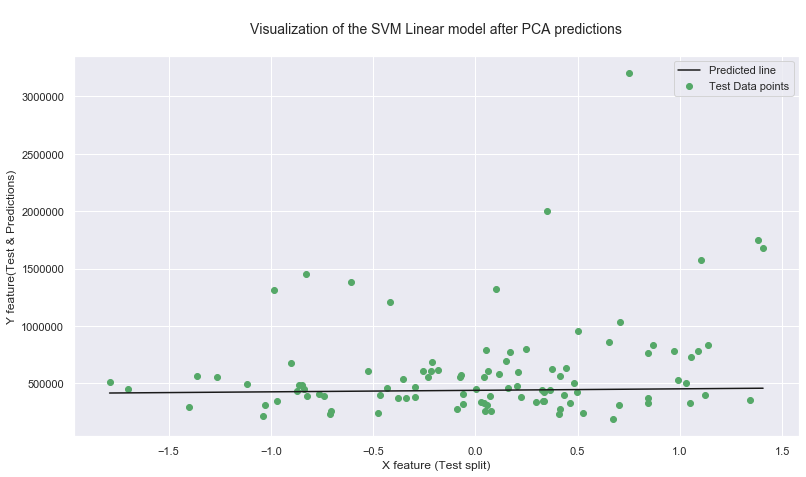

In [502]:
X_b = X_train_reduced[:100,10].reshape(-1,1)
y_b = y_train[:100]
svregt = SVR(kernel='linear',C=5000)
svregt.fit(X_b, y_b)
cm=pd.DataFrame({'x':X_test_reduced[:100,10].tolist(),'y':y_test[:100].tolist()}).sort_values(by='x')
y_predict = svregt.predict(cm['x'].values.reshape(-1,1))
plt.figure(figsize=(13,7))
plt.plot(cm['x'].tolist(), y_predict, c = 'k',label='Predicted line')
plt.scatter(cm['x'].tolist(), cm['y'].tolist(),label='Test Data points',c='g')
plt.title('\nVisualization of the SVM Linear model after PCA predictions\n',fontsize=14)
plt.xlabel('X feature (Test split)',fontsize=12)
plt.ylabel('Y feature(Test & Predictions)',fontsize=12)
plt.legend()
plt.show()

<div class="alert alert-block alert-danger">

From the above results we can see that the SVM RBF model after PCA yields the best results when `C = 5000` which leads to the best R<sup>2</sup> score of `0.608017`.
<div>

<div class="alert alert-block alert-info">
<b><font size="4">Artificial Neural Network</font></b>

In [263]:
from keras.models import Sequential
from keras.layers import Dense

Using TensorFlow backend.


<div class="alert alert-block alert-warning">
The optimizer and the loss are two arguments that are required if you want to compile the model.<br>Some of the most popular optimization algorithms used are the Stochastic Gradient Descent (SGD), ADAM and RMSprop<br><br>
 The choice for a loss function depends on the task:   <br>
 • In regression problem, we use the Mean Squared Error (MSE).  <br> 

 

In [363]:
# create model
model = Sequential()
model.add(Dense(300, input_dim=X_train.shape[1], kernel_initializer='normal', activation='relu'))
model.add(Dense(94, kernel_initializer='normal', activation='relu'))
model.add(Dense(32, kernel_initializer='normal'))
model.add(Dense(1,kernel_initializer='normal'))

In [364]:
# Compile model
model.compile(loss='mse', optimizer='adam' , metrics = ['mse'])

In [415]:
ann_result = model.fit(X_train, y_train, epochs = 100, batch_size = 20)

Epoch 1/100
15129/15129 [==============================] - 1s 69us/step - loss: 9803990645.6866 - mse: 9803993088.0000
Epoch 2/100
15129/15129 [==============================] - 1s 97us/step - loss: 9837396430.6918 - mse: 9837406208.0000
Epoch 3/100
15129/15129 [==============================] - 1s 66us/step - loss: 9656956221.6268 - mse: 9656954880.0000
Epoch 4/100
15129/15129 [==============================] - 1s 94us/step - loss: 9674328495.0831 - mse: 9674327040.0000
Epoch 5/100
15129/15129 [==============================] - 1s 88us/step - loss: 9707901651.9204 - mse: 9707906048.0000
Epoch 6/100
15129/15129 [==============================] - 1s 82us/step - loss: 9654292892.2668 - mse: 9654294528.0000
Epoch 7/100
15129/15129 [==============================] - 1s 66us/step - loss: 9619163786.5673 - mse: 9619163136.0000
Epoch 8/100
15129/15129 [==============================] - 1s 63us/step - loss: 9684183901.0663 - mse: 9684184064.0000
Epoch 9/100
15129/15129 [=======================

In [416]:
model.evaluate(X_train, y_train)

15129/15129 [==============================] - 0s 19us/step


[8647232039.155529, 8647233536.0]

In [417]:
model.evaluate(X_test, y_test)

6484/6484 [==============================] - 0s 16us/step


[16316825500.190006, 16316828672.0]

In [425]:
y_pred = model.predict(X_test)

In [426]:
r2_score(y_test, dl_pred)
#R2 score

0.9003210820706283

In [427]:
y_train_predict = model.predict(X_train)
y_test_predict = model.predict(X_test)

In [428]:
print(f'Artificial Neural Network Metrics: ')
print(f'\n\t• Train score: {r2_score(y_train, y_train_predict)}')
print(f'\n\t• Test score: {r2_score(y_test, y_test_predict)}')
print(f'\n\t• Root Mean Squared Error: {np.sqrt(mean_squared_error(y_test, y_pred))}')
print('----------------------------------------------------------------------------')

Artificial Neural Network Metrics: 

	• Train score: 0.9353221776356635

	• Test score: 0.881152353036982

	• Root Mean Squared Error: 127737.32970039328
----------------------------------------------------------------------------


In [377]:
model.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_30 (Dense)             (None, 300)               5700      
_________________________________________________________________
dense_31 (Dense)             (None, 94)                28294     
_________________________________________________________________
dense_32 (Dense)             (None, 32)                3040      
_________________________________________________________________
dense_33 (Dense)             (None, 1)                 33        
Total params: 37,067
Trainable params: 37,067
Non-trainable params: 0
_________________________________________________________________


In [429]:
loss=pd.DataFrame(model.history.history)
loss.head()

,loss,mse
0,9.803991e+09,9.803993e+09
1,9.837396e+09,9.837406e+09
2,9.656956e+09,9.656955e+09
3,9.674328e+09,9.674327e+09
4,9.707902e+09,9.707906e+09


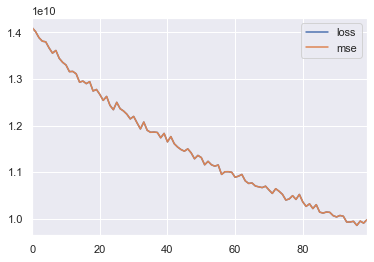

In [379]:
loss.plot();

<div class="alert alert-block alert-success">Let's visualize the best fitted line by the Artificial Neural Network Model 

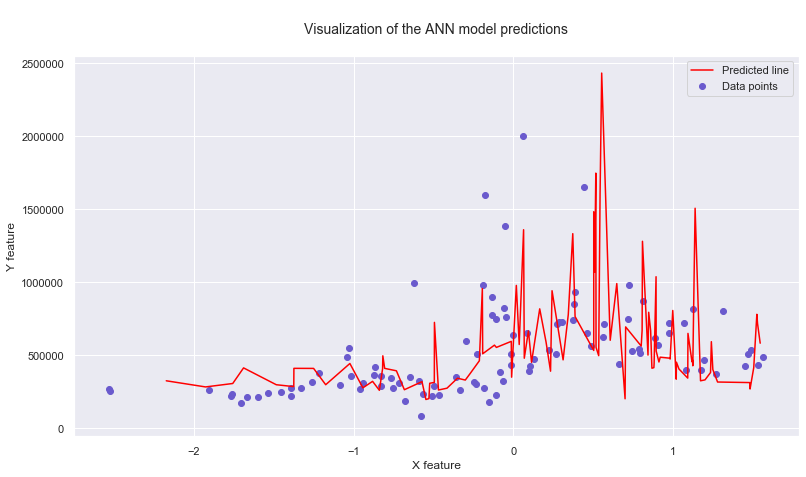

In [438]:
cm=pd.DataFrame({'x':X_test[:100,14].tolist(),'y':y_pred[:100].tolist()}).sort_values(by='x')
plt.figure(figsize=(13,7))
plt.plot(cm['x'].tolist(), cm['y'].tolist(), c = 'red',label='Predicted line')
plt.scatter(X_train[:100,14].reshape(-1,1), y_train[:100],label='Data points',c='slateblue')
plt.title('\nVisualization of the ANN model predictions\n',fontsize=14)
plt.xlabel('X feature',fontsize=12)
plt.ylabel('Y feature',fontsize=12)
plt.legend()
plt.show()

<div class="alert alert-block alert-danger">

From the above results we can see that the Artificial Neural Network model yields the best R<sup>2</sup> score of `0.9003210`. It is very close to the score of Gradient Boosting Regressor. 
<div>

<div class="alert alert-info" role="alert">
<b><font size="4">  Model Selection: </font></b>
    
Compare the performance before and after reduced the dimension of the data  
</div>

In [548]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

print("Before PCA")
project1_result_table = pd.read_csv("project1_result_table.csv", index_col = 0)
project1_result_table
print("After PCA")
dict={'R2 Score':[0.778463,0.658828,0.658655,0.658792,0.808957,0.607838,0.447592,0.677522,0.608017],
      'RMSE':[174399,216425,216480,216437,161952,232035,275392,210412,231982],
      'Optimal Parameter':["n-neighbors = 7","None", "alpha = 120","alpha = 120", "degree = 2","C = 8450","C = 5000, gamma = 0.001","C = 5000, degree = 3","C = 5000"]}
model_results= pd.DataFrame(dict,index=['KNN Regressor','Simple Linear Regression','Ridge Regression','Lasso Regression', 
                                        'Polynomial Regression', 'Linear Support Vector Regressor', 'SVM- Kernal (RBF) Regressor', 
                                        'SVM- Kernal (Poly) Regressor','SVM- Kernal (Linear) Regressor'])
print('\n\n Metrics Summary of all Models(sorted based on R2 score):')
display(model_results.sort_values(by=['R2 Score'],ascending=False))

Before PCA


,R2 Score,RMSE,Optimal Parameter
KNN Regressor,0.778513,174379,n-neighbors = 7
Simple Linear Regression,0.669379,213052,None
Ridge Regression,0.669072,213151,alpha = 120
Lasso Regression,0.669352,213061,alpha = 80
Polynomial Regression,0.812826,160304,degree = 2
Linear Support Vector Regressor,0.616850,229354,C = 8450
SVM- Kernal (RBF) Regressor,0.447915,275312,"C = 5000, gamma = 0.001"
SVM- Kernal (Poly) Regressor,0.693712,205062,"C = 5000, degree = 3"
SVM- Kernal (Linear) Regressor,0.617710,229096,C = 5000


After PCA


 Metrics Summary of all Models(sorted based on R2 score):


,R2 Score,RMSE,Optimal Parameter
Polynomial Regression,0.808957,161952,degree = 2
KNN Regressor,0.778463,174399,n-neighbors = 7
SVM- Kernal (Poly) Regressor,0.677522,210412,"C = 5000, degree = 3"
Simple Linear Regression,0.658828,216425,None
Lasso Regression,0.658792,216437,alpha = 120
Ridge Regression,0.658655,216480,alpha = 120
SVM- Kernal (Linear) Regressor,0.608017,231982,C = 5000
Linear Support Vector Regressor,0.607838,232035,C = 8450
SVM- Kernal (RBF) Regressor,0.447592,275392,"C = 5000, gamma = 0.001"


<div class="alert alert-block alert-danger">
<b> After all model applied PCA, R2 score has slightly decrease and RMSE has increase, which indicates the results not as good as before.</font></b>
    
</div>

In [6]:
dict={'R2 Score':[0.641538,0.796424,0.642874, 0.864006, 0.628448, 0.62418, 0.902918, 0.900321],
      'RMSE':[221841, 167180, 221428, 136641, 225856, 227149, 115449, 127737],
      'Optimal Parameter':["max features = 10, max samples = 0.1 , n_estimators = 300", "max features = 10 , n_estimators = 200", "max features = 10 , max samples = 0.5 , n_estimators = 300", 
                           "max features = 10 , max_samples = 0.5 , n_estimators = 300", "learning rate = 0.05 , loss = linear , n_estimators = 50", "learning rate = 0.05 , loss = linear , n_estimators = 50",
                          "learning rate = 0.1, max depth = 5, max features = 10, max estimators = 200", "kernel_initializer = normal, activation = relu, optimizer = adam"]}
model_results= pd.DataFrame(dict,index=[' Linear Regression with Bagging','KNN with Bagging','Lasso with Pasting','Decision Tree Regression with Pasting', 
                                        'Adaboost Boosting with Linear Regression', 'Adaboost Boosting with Decision Tree', 'Gradient Boosting Regression', 
                                        'Artificial Neural Network'])
print('\n\n Metrics Summary of all Models(sorted based on R2 score):')
display(model_results.sort_values(by=['R2 Score'],ascending=False))



 Metrics Summary of all Models(sorted based on R2 score):


,R2 Score,RMSE,Optimal Parameter
Gradient Boosting Regression,0.902918,115449,"learning rate = 0.1, max depth = 5, max featur..."
Artificial Neural Network,0.900321,127737,"kernel_initializer = normal, activation = relu..."
Decision Tree Regression with Pasting,0.864006,136641,"max features = 10 , max_samples = 0.5 , n_esti..."
KNN with Bagging,0.796424,167180,"max features = 10 , n_estimators = 200"
Lasso with Pasting,0.642874,221428,"max features = 10 , max samples = 0.5 , n_esti..."
Linear Regression with Bagging,0.641538,221841,"max features = 10, max samples = 0.1 , n_estim..."
Adaboost Boosting with Linear Regression,0.628448,225856,"learning rate = 0.05 , loss = linear , n_estim..."
Adaboost Boosting with Decision Tree,0.624180,227149,"learning rate = 0.05 , loss = linear , n_estim..."


<div class="alert alert-block alert-warning">
    
<font size="4">`Gradient Boosting Regression` and `Neural Network` are the best model among all. It is also surprisingly that the baseline `Decision Tree Regression` model with pasting yield really good results. </font>

</div>